# Visualise non-linear FDM corrections at all stages

In [1]:
import fdm.util
import constants as c

print("Jean's scale at z=5", "Lague: ", fdm.util.lague_kj(a=1/6, m = c.FDM_M), "Li: ", fdm.util.li_kj(a=1/6, m = c.FDM_M))
print("Redshift : {} corresponds to eta_in {}".format(c.Z_IN , c.ETA_IN ))
print("Redshift : {} corresponds to eta    {}".format(c.Z_FIN, c.ETA_FIN))

print("MBH0", fdm.util.mbH0(m=c.FDM_M))

print("Table 1: Jeans scales for different masses and redshifts")
masses    = [1e-21, 1e-22, 1e-23]
scale_factors = [0.01, 1]

for a in scale_factors:
  kj = []
  for m in masses:
    kj.append(int(round(fdm.util.li_kj(a, m, omega_m=0.315903), 0)))
  print(f"${a}$ & ${kj[0]}$ & ${kj[1]}$ & ${kj[2]}$ \\\\")

Jean's scale at z=5 Lague:  22.829085844970553 Li:  22.828542753540727
Redshift : 100.0 corresponds to eta_in 0.19900743804199783
Redshift : 0.0 corresponds to eta    2.0
MBH0 521.6107425157533
Table 1: Jeans scales for different masses and redshifts
$0.01$ & $85$ & $27$ & $8$ \\
$1$ & $268$ & $85$ & $27$ \\


In [4]:
25/70, 5/14

(0.35714285714285715, 0.35714285714285715)


### Visualise initial CAMB spectrum

In [2]:
import matplotlib.pyplot as plt 
from initial_spectrum import KH_LINEAR, KH_NONLINEAR, PK_LINEAR, PK_NONLINEAR, REDSHIFTS_LINEAR, P0_fit, P0_naive, P0_interpolation

for i, (redshift, line) in enumerate(zip(REDSHIFTS_LINEAR,['-','--'])):
    plt.loglog(KH_LINEAR,    PK_LINEAR[i,:],    color='k', ls = line)
    plt.loglog(KH_NONLINEAR, PK_NONLINEAR[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left')
plt.title('Matter power at z=%s and z= %s'%tuple(REDSHIFTS_LINEAR))
plt.show()

Do not compute initial spectrum using CAMB


ImportError: cannot import name 'KH_LINEAR' from 'initial_spectrum' (/home/xerox/Documents/Masterarbeit/fdm-eulerpt/python/src/initial_spectrum.py)

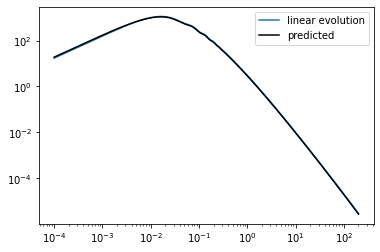

In [5]:
plt.loglog(KH_LINEAR, PK_LINEAR[1, :] * (h.eta_from_z(c.Z_FIN)/h.eta_from_z(c.Z_IN))**4, label="linear evolution")
plt.loglog(KH_LINEAR, PK_LINEAR[0,:], color='k', label="predicted")
plt.legend()

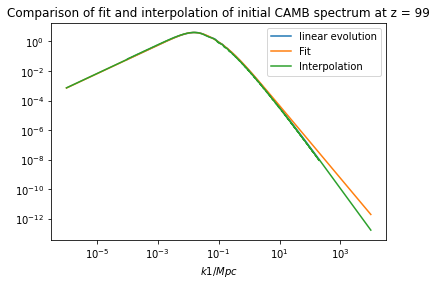

In [2]:
import numpy as np 
import constants as c
plt.title(f"Comparison of fit and interpolation of initial CAMB spectrum at z = {c.Z_IN}")
plt.loglog(KH_LINEAR, PK_LINEAR[1, :], label="linear evolution")

ks = np.logspace(-6, 4, 2000)
plt.loglog(ks, P0_fit(ks), label="Fit")

y = []
for k in ks:
  y.append(P0_interpolation(k))
plt.loglog( ks, y, label="Interpolation")

plt.xlabel('$k 1/Mpc$')
plt.legend()
plt.show()

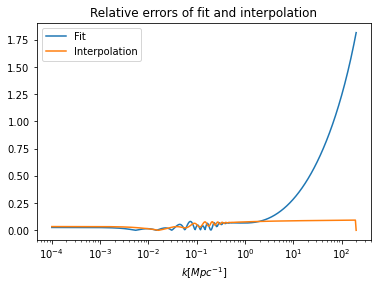

In [4]:
plt.title("Relative errors of fit and interpolation")
plt.xlabel('$k [Mpc^{-1}]$')
plt.xscale("log")
y1 = []
y2 = []
for i, k in enumerate(KH_LINEAR):
  y1.append( np.abs(PK_LINEAR[1, i] - P0_fit(k)          )/PK_LINEAR[1, i])
  y2.append( np.abs(PK_LINEAR[1, i] - P0_interpolation(k))/PK_LINEAR[1, i])
  if np.abs(y2[-1]) > 1e10:
      print(i, k)

plt.plot(KH_LINEAR, y1, label="Fit")
plt.plot(KH_LINEAR, y2, label="Interpolation")
plt.legend()
plt.show()

### Cosmology

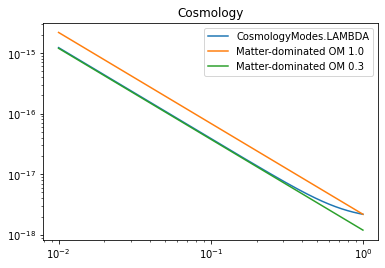

In [3]:
import matplotlib.pyplot as plt 
import constants as c 

plt.title(f"Cosmology")
plt.loglog(c.SPLINE_SCALE_FACTORS, c.hubble(c.SPLINE_SCALE_FACTORS), label = f"{c.COSMOLOGY_MODE}")
plt.loglog(c.SPLINE_SCALE_FACTORS, c.H0_SI_HUBBLE * (1.0 * c.SPLINE_SCALE_FACTORS**(-3))**(1/2), label = f"Matter-dominated OM 1.0")
plt.loglog(c.SPLINE_SCALE_FACTORS, c.H0_SI_HUBBLE * (0.3 * c.SPLINE_SCALE_FACTORS**(-3))**(1/2), label = f"Matter-dominated OM 0.3")
plt.legend()
plt.show()

### Compare growth factors in CDM and FDM

In [6]:
import fdm.util as fdu 

fdu.li_kj(1, 1e-22, 0.3), fdu.lague_kj(1, 1e-22, 0.3)

(68.95261989125157, 68.95426027528009)

Integrate CDM D+ for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
Integrate CDM IC for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
Integrate CDM D- for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
Integrate CDM IC for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
Fit new spline.
Integrate FDM D- for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465628, -0.0014779730447904912) at a_in = 1000


/home/xerox/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


Integrate FDM D+ for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D+: (1, 100.9999999996939) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465628, -0.0014779730447904912) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D+: (1, 100.9999999996939) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465628, -0.0014779730447904912) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D+: (1, 100.9999999996939) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465628, -0.0014779730447904912) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 1 at a_in = 0.009900990099009901
IC for FDM D+: (1, 100.9999999996939) at 

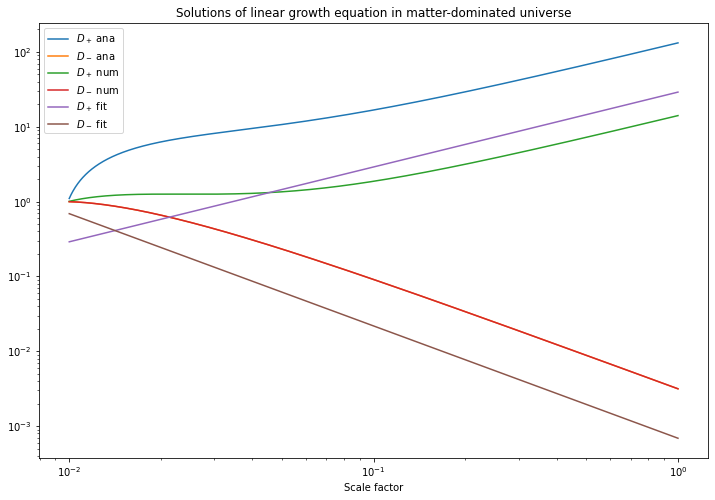

In [3]:
import matplotlib.pyplot as plt 
import fdm.growth.numerical       as fdn
import fdm.growth.analytical      as fda
import fdm.growth.renormalised      as fdr
import fdm.growth.fit             as fdf
import cdm.growth.analytical      as cda
import constants as c
import numpy as np
av = np.logspace(-2, 0, 1000)


plt.figure(figsize=(12,8))

for k in [14]:
    m = c.FDM_M
    Dxp = [fda.D_plus(k, a, c.A_IN, c.FDM_M) for a in av]
    Dxm = [fda.D_minus(k, a, c.A_IN, c.FDM_M) for a in av]

    Dnp = [fdn.D_plus(k, a, c.A_IN, c.FDM_M) for a in av]
    Dnm = [fdn.D_minus(k, a, c.A_IN, c.FDM_M) for a in av]

    Dfp = [fdf.D_plus(k, a, c.A_IN, c.FDM_M) for a in av]
    Dfm = [fdf.D_minus(k, a, c.A_IN, c.FDM_M) for a in av]

    plt.loglog(av, Dxp, label=r"$D_+$ ana")
    plt.loglog(av, Dxm, label=r"$D_-$ ana")
    plt.loglog(av, Dnp, label=r"$D_+$ num")
    plt.loglog(av, Dnm, label=r"$D_-$ num")
    plt.loglog(av, Dfp, label=r"$D_+$ fit")
    plt.loglog(av, Dfm, label=r"$D_-$ fit")
    #plt.loglog(av, av/c.A_IN, label="CDM growing mode")
    #plt.loglog(av, (av/c.A_IN)**(-3/2), label="CDM decaying mode")
    plt.xlabel("Scale factor")
    plt.legend()
    plt.title("Solutions of linear growth equation in matter-dominated universe")
    plt.show()

In [4]:
import fdm.growth.numerical      as fdn
import fdm.growth.analytical      as fda
import fdm.growth.renormalised      as fdr
import cdm.growth.analytical      as cda
import constants as c 
import numpy as np
av = c.SPLINE_SCALE_FACTORS
k = 50
m = c.FDM_M
a_in = c.A_IN 
D1, dD1, D2, dD2, temp1, temp2 = fdn.numerical_D(k, c.A_IN, c.FDM_M, debug = False, hubble = c.hubble, dlogHubble = c.dloghubble)
Dp = [fda.D_plus (k, a, c.A_IN, c.FDM_M) for a in av]
Dm = [fda.D_minus(k, a, c.A_IN, c.FDM_M) for a in av]
D2  = D2/temp2.sol(0.01)[0]
dD2 = dD2/temp2.sol(0.01)[0]
#D1  = D1/temp1.sol(0.01)[0]
#dD1 = dD1/temp1.sol(0.01)[0]
da =    (np.roll(av, -1) - np.roll(av, 1))
dDp  = (np.roll(Dp, -1)  - np.roll(Dp, 1))/da
dDm  = (np.roll(Dm, -1)  - np.roll(Dm, 1))/da

Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465615, -0.0014779730447904854) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D+: (1, 101.00000000012501) at a_in = 0.009900990099009901


/home/xerox/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


In [6]:
from fdm.util import b_f 
import matplotlib.pyplot as plt 
from special_functions import jv 
def D_plus(k, a, m):
    eta    = c.eta_from_a(a)
    p1     = np.sqrt(1/eta)
    bk     = b_f(k, m)
    p2     = jv(-2.5, bk/eta)
    return p1 * p2

def D_minus(k, a, m):
    eta    = c.eta_from_a(a)
    p1 = np.sqrt(1/eta)
    bk = b_f(k, m)
    p2 = jv(2.5, bk/eta)
    return p1 * p2

k = 50

Dp = [D_plus (k, a, c.FDM_M) for a in av]
Dm = [D_minus(k, a, c.FDM_M) for a in av]

da   = (np.roll(av, -1) - np.roll(av, 1))
dDp  = (np.roll(Dp, -1)  - np.roll(Dp, 1))/da
dDm  = (np.roll(Dm, -1)  - np.roll(Dm, 1))/da


t = np.arange(len(av) - 6)

da =    (np.roll(av, -1) - np.roll(av, 1))

ddD1 = (np.roll(dD1, -1) - np.roll(dD1, 1))/da
ddD2 = (np.roll(dD2, -1) - np.roll(dD2, 1))/da

dDp  = (np.roll(Dp, -1)  - np.roll(Dp, 1))/da
dDm  = (np.roll(Dm, -1)  - np.roll(Dm, 1))/da
ddDp = (np.roll(dDp, -1) - np.roll(dDp, 1))/da
ddDm = (np.roll(dDm, -1) - np.roll(dDm, 1))/da

i = np.s_[3: -3]

np.savez("../../C/data/growth/nonorthogonality.npz", 
a = av[i], 
Dp_ana   =   Dp[i], Dm_ana   =   Dm[i], Dp_num   =   D1[i]/D1[0] * .21, Dm_num   =   D2[i]/D2[0] * .21, 
dDp_ana  =  dDp[i], dDm_ana  =  dDm[i], dDp_num  =  dD1[i]/D1[0] * .21, dDm_num  =  dD2[i]/D2[0] * .21, 
ddDp_ana = ddDp[i], ddDm_ana = ddDm[i], ddDp_num = ddD1[i]/D1[0] * .21, ddDm_num = ddD2[i]/D2[0] * .21)


In [1]:
import cdm.growth.numerical as cgn 
import fdm.growth.numerical as fgn

import scipy.interpolate as interpolate 
import constants 


/home/xerox/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."
/home/xerox/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


In [ ]:
@njit 
def f(a):
    return a 

In [ ]:
%%timeit
f(0.4)

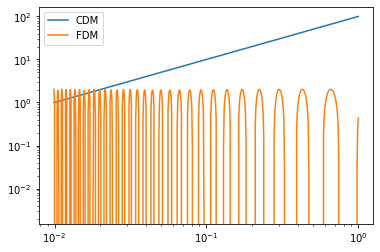

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cdm.growth.numerical as cgn
import fdm.growth.numerical as fgn
import constants 

y1 = []
y2 = []
a_s = constants.SPLINE_SCALE_FACTORS
for a in a_s:
    y1.append(cgn.D_plus(87, a, 0.01, constants.FDM_M))
    y2.append(fgn.D_plus(87, a, 0.01, constants.FDM_M))

plt.loglog(a_s, np.array(y1), label="CDM")
plt.loglog(a_s, np.array(y2), label="FDM")
plt.legend()
plt.show()

In [28]:
def plot_model_fit(x, y, X, Y, Z, fit):
    # Plot the 3D figure of the fitted function and the residuals.
    logx = np.log10(x)
    logy = np.log10(y)
    logX = np.log10(X)
    logY = np.log10(Y)
    logZ = np.log10(np.abs(Z))

    fig = plt.figure(figsize=(12, 8), dpi=160)
    ax = fig.gca(projection='3d')
    ax.plot_surface(logX, logY, logZ, cmap='inferno')
    ax.set_xlabel("momentum $k$ in $h/Mpc$")
    ax.set_ylabel("scale factor $a$")
    ax.set_xticks([-4, -3, -2, -1, 0, 1, 2], ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$", "$10^{2}$"])
    ax.set_yticks([-2, -1, 0], ["$10^{-2}$", "$10^{-1}$", "$10^{0}$"])
    plt.savefig("../../figures/fit0.pdf")
    plt.show()

    # Plot the 3D figure of the fitted function and the residuals.
    fig = plt.figure(figsize=(12, 8), dpi=160)
    ax = fig.gca(projection='3d')
    ax.plot_surface(logX, logY, np.log10(fit), cmap='inferno')
    ax.set_xlabel("momentum $k$ in $h/Mpc$")
    ax.set_ylabel("scale factor $a$")

    ax.set_xticks([-4, -3, -2, -1, 0, 1, 2], ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$", "$10^{2}$"])
    ax.set_yticks([-2, -1, 0], ["$10^{-2}$", "$10^{-1}$", "$10^{0}$"])
    cset = ax.contourf(logX, logY, logZ, zdir='z', offset=-14, cmap='inferno')

    ax.set_zlim(-14,np.max(logZ)+2)
    plt.savefig("../../figures/fit1.pdf")
    plt.show()

    # Plot the test data as a 2D image and the fit as overlaid contours.
    fig = plt.figure(figsize=(12, 8), dpi=160)
    ax = fig.add_subplot(111)
    ax.set_xlabel("momentum $k$ in $h/Mpc$")
    ax.set_ylabel("scale factor $a$")

    ax.set_xticks([-4, -3, -2, -1, 0, 1, 2], ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$", "$10^{2}$"])
    ax.set_yticks([-2, -1, 0], ["$10^{-2}$", "$10^{-1}$", "$10^{0}$"])
    ax.imshow(logZ, origin='lower', cmap='inferno',
                extent=(logx.min(), logx.max(), logy.min(), logy.max()))
    ax.contour(logX, logY, np.log10(fit), colors='w', levels=20)

    plt.savefig("../../figures/fit2.pdf")
    plt.show()

In [35]:
constants.FDM_M

1e-23

In [3]:
import constants
import fdm.util 
import fdm.growth.numerical as fdn 
import fdm.growth.analytical as fga 
import fdm.growth.renormalised as fgr 
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def li_kj(a, m, omega_m = 0.315903, h = 0.67321170):
  return h * 44.7*(6*a*omega_m/0.3)**(0.25) * (m/(1e-22))**0.5  #Mpc^-1

def fit_model_D(D_CDM, m, a_in):
    x = constants.SPLINE_MOMENTA
    y = constants.SPLINE_SCALE_FACTORS 
    
    # The two-dimensional domain of the fit.
    X, Y = np.meshgrid(x, y)

    # The function to be fit is Z.
    Z = np.zeros(X.shape)
    for i, k in enumerate(x):
        for j, a in enumerate(y):
            #print(f"{i+1}/{len(x)}")
            D1 = fga.D_plus(k, a, constants.A_IN, constants.FDM_M)
            Z[j, i] = D1


    def D_fit(M, *args):
        k, a      = M
        alpha, beta = args
        kj = li_kj(a_in, m, 1, 0.67321170)
        return 1/(1 + alpha * (k/kj)**beta) * D_CDM(k, a, a_in, m)

    #def D_fit(M, *args):
    #    k, a      = M
    #    alpha, beta = args
    #    kj   = fdm.util.li_kj(a_in, m)
    #    return (1 - (1 + np.exp(-2*alpha * (k - beta * kj))**(-8))) * D_CDM(k, a, a_in, m)

    # Initial guesses to the fit parameters.
    p0 = [.61, 6.46]

    xdata      = np.vstack((X.ravel(), Y.ravel()))
    popt, pcov = curve_fit(D_fit, xdata, Z.ravel(), p0, maxfev=10000)


    def D(k, a, a_in, m):
        alpha, beta = popt
        kj = li_kj(a_in, m, 1, 0.67321170)
        return 1/(1 + alpha * (k/kj)**beta) * D_CDM(k, a, a_in, m)


    #def D(k, a, a_in, m):
    #    alpha, beta = popt
    #    kj   = fdm.util.li_kj(a_in, m)
    #    return (1 - (1 + np.exp(-2*alpha * (k - beta * kj))**(-8))) * D_CDM(k, a, a_in, m)

    fit = D(X, Y, a_in = a_in, m = m).reshape(X.shape)

    print('Fitted parameters:')
    print(popt)

    rms = np.sqrt(np.mean((Z - fit)**2))
    print('RMS residual =', rms)

    return D, x, y, X, Y, Z, fit, popt, pcov

In [4]:
import cdm.growth.analytical as cda 
import cdm.growth.numerical as cdn
import fdm.growth.renormalised as fdr
import fdm.growth.analytical as fda
import fdm.growth.numerical as fdn 
import constants as c

# The two-dimensional domain of the fit.
D_plus, x, y, X, Y, Z, fit, popt, pcov = fit_model_D(cda.D_plus, m = c.FDM_M, a_in = 0.01)

Fitted parameters:
[0.04052777 6.49101277]
RMS residual = 55.52335584161142


In [ ]:
0.52920362 6.49527297

In [5]:

plot_model_fit(x, y, X, Y, Z, fit)

NameError: name 'plot_model_fit' is not defined

In [16]:
np.savez("../../C/data/growth/mdu_fit.npz", x = x, y = y, X = X, Y = Y, Z = Z, fit = fit)

Fitted parameters:
[2.23506882e-12 1.64744511e+01]
RMS residual = 10.94436455942036


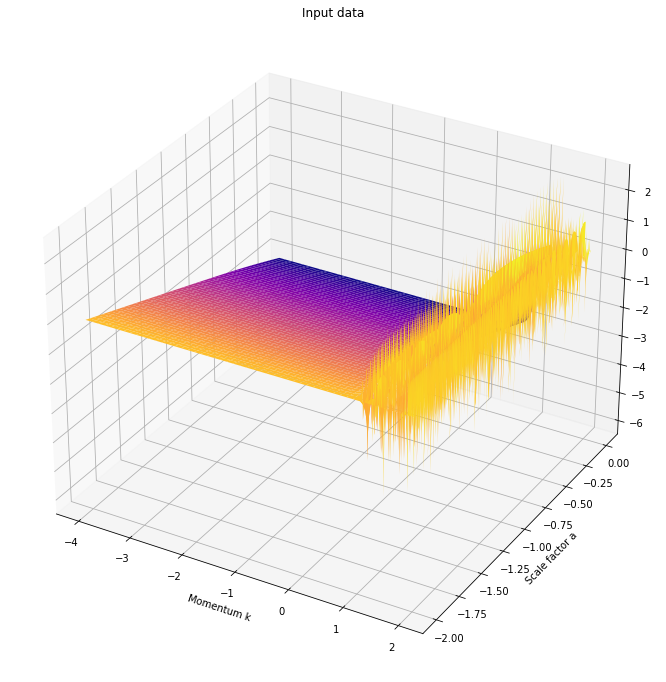

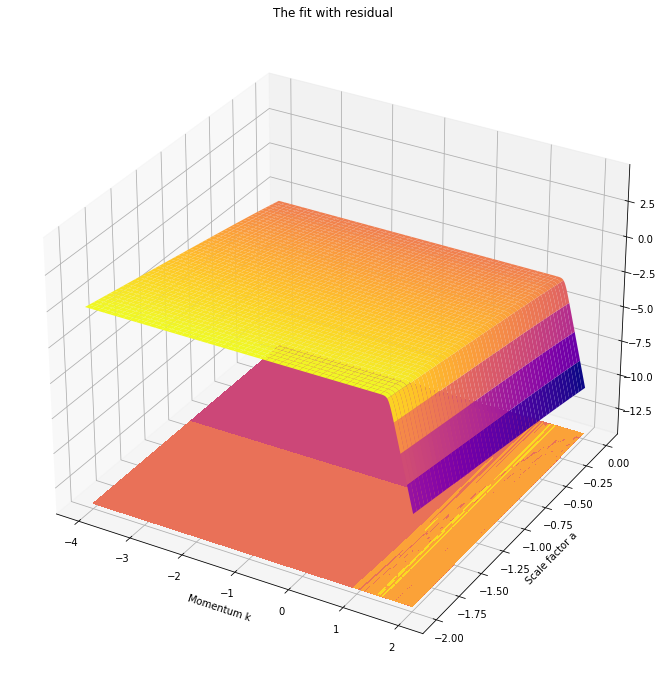

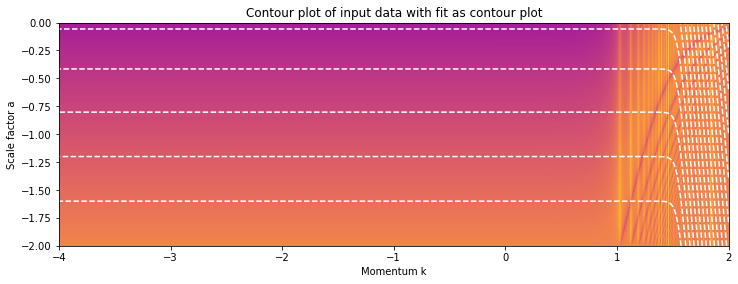

In [16]:

D_minus, x, y, X, Y, Z, fit, popt, pcov = fit_model_D(fdn.D_minus, cdn.D_minus_nnjit, m = m, a_in = 0.01)
plot_model_fit(D_minus, x, y, X, Y, Z, fit)


y [[1.72251193e-05]] yn [[8.52174261e-07]]
growth [[1.21017497]] ren res [[0.00010334]]
y [[1.75403375e-05]] yn [[6.98553868e-07]]
growth [[1.49872679]] ren res [[0.00010523]]
y [[2.16437559e-05]] yn [[1.06757132e-06]]
growth [[1.20712522]] ren res [[0.00012985]]
y [[-1.01358842e-05]] yn [[2.0177888e-07]]
growth [[-2.98678034]] ren res [[-6.08140783e-05]]
y [[1.28663475e-05]] yn [[-6.11706426e-07]]
growth [[-1.22013348]] ren res [[7.72028075e-05]]
y [[1.68504441e-05]] yn [[-3.77084761e-07]]
growth [[-2.42910183]] ren res [[0.00010111]]
y [[1.67830521e-05]] yn [[2.33707122e-07]]
growth [[3.79013191]] ren res [[0.0001007]]
y [[1.75901622e-05]] yn [[-3.00872286e-07]]
growth [[-2.97166115]] ren res [[0.00010554]]
y [[-1.67557265e-05]] yn [[4.04242397e-07]]
growth [[-2.05027607]] ren res [[-0.00010053]]
y [[1.46478464e-05]] yn [[-5.3389832e-07]]
growth [[-1.20125083]] ren res [[8.78917707e-05]]
y [[-1.17606381e-05]] yn [[-3.94137761e-07]]
growth [[1.22451534]] ren res [[-7.05666101e-05]]
y 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


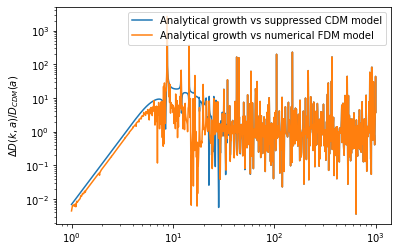

In [4]:
y4 = np.array([np.abs(fda.D_plus(k, constants.A_FIN, constants.A_IN, m) - fds.D_plus(k, constants.A_FIN, constants.A_IN, m)) for k in ks])
y5 = np.array([np.abs(fda.D_plus(k, constants.A_FIN, constants.A_IN, m) - fdn.D_plus(k, constants.A_FIN, constants.A_IN, m)) for k in ks])

plt.ylabel("$\Delta D(k, a) / D_{CDM}(a)$")
plt.loglog(ks, y4, label="Analytical growth vs suppressed CDM model")
plt.loglog(ks, y5.flatten(), label="Analytical growth vs numerical FDM model")
plt.legend()
plt.savefig('../figures/FDMvsCDMD.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


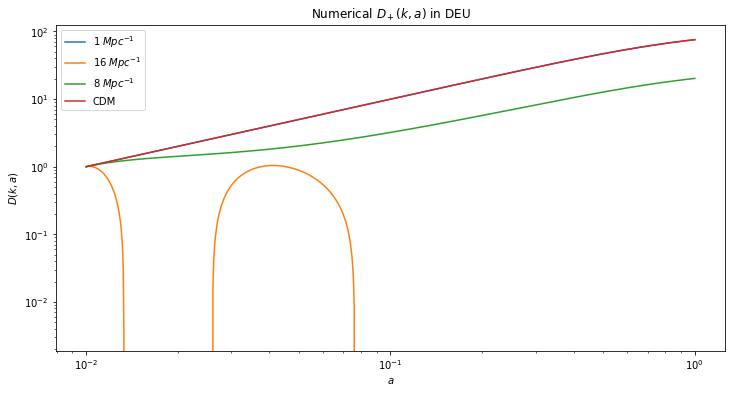

In [15]:
import fdm.growth.analytical as fda 
import fdm.growth.numerical  as fdn 
import cdm.growth.analytical as cda 
import cdm.growth.numerical  as cdn 

import numpy as np 
import matplotlib.pyplot as plt 

import constants
a_array = np.logspace(-2, 0, 1000)
k_array = np.array([1, 16, 8])

m = 1e-23
y = []

  
plt.figure(figsize=(12, 6))

for k in k_array:
  y = [fdn.D_plus(k, a, constants.A_IN, m) for a in a_array]
  plt.loglog(a_array, y, label=f"{k}" + r"$\;Mpc^{-1}$")

y = [cdn.D_plus(k, a, constants.A_IN, m) for a in a_array]
plt.loglog(a_array, y, label=f"CDM")

plt.title(r"Numerical $D_+(k, a)$ in DEU")
plt.ylabel("$D(k, a)$")
plt.xlabel("$a$")
plt.legend()
plt.savefig('../figures/FDMCDMGrowth.eps', format='eps', dpi=1200)

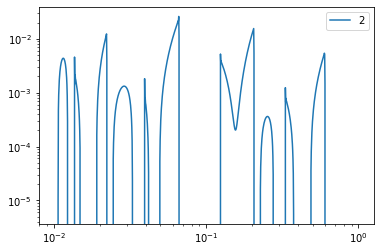

In [4]:

import fdm.growth.numerical      as fgn
import cdm.growth.numerical      as cgn 
import cdm.growth.analytical     as cga
import constants

import numpy as np
import matplotlib.pyplot as plt
av = constants.SPLINE_SCALE_FACTORS
a_in = constants.A_IN 
m = constants.FDM_M 
k = 1e-2
Dp1 = [cgn.ddD_plus(k, a, a_in, m) for a in av]
Dp2 = [fgn.ddD_plus(k, a, a_in, m) for a in av]

#plt.loglog(av, Dp1, label="1")
plt.loglog(av, Dp2, label="2")
plt.legend()
plt.show()

In [19]:
import cdm.growth.analytical     as cga
import cdm.growth.numerical      as cgn 
import fdm.growth.analytical     as fga
import fdm.growth.renormalised   as fgr
import fdm.growth.suppressed_cdm as fgs
import fdm.growth.numerical      as fgn
import fdm.growth.fit            as fgf

import cdm.couplings.analytical     as cca
import cdm.couplings.numerical      as ccn 
import fdm.couplings.analytical     as fca
import fdm.couplings.renormalised   as fcr
import fdm.couplings.suppressed_cdm as fcs
import fdm.couplings.numerical      as fcn
import fdm.couplings.fit            as fcf

import fdm.util 
import constants

import numpy as np
import matplotlib.pyplot as plt

a_s  = np.logspace(-2, 0, 100)
s    = 0.5
a_in = 1
e_in = constants.eta_from_a(a_in)
m    = 1e-23
k_vec        = np.array([1e-3, 5, 15, 35])

def get_momentum_label(k):
    return f" for k = {k}" + r" $Mpc^{-1}$"

#growth_namespaces   = [fgr, fga, fgs, fgn, cgn, cga]
#growth_namespaces   = [fgr, fgs]
growth_namespaces   = [fga, fgf, fgn, cga]
#coupling_namespaces = [fcr, fca, fcs, fcn, ccn, cca]
#coupling_namespaces = [fcr, fcs]
coupling_namespaces = [fca, fcf, fcn, cca]

titles =[   r"$D_+$", 
            r"$D_-$", 
            r"$\frac{d}{da}D_+$", 
            r"$\frac{d}{da}D_-$", 
            r"$G$", 
            r"$\frac{d}{ds}G$",
            r"$\frac{d}{d\eta}G$",
            r"$\frac{d^2}{ds\,d\eta}G$",
            r"$f_1$",
            r"$f_2$"
        ]
#labels =["F_r", "F_a", "F_s", "F_n", "C_n", "C_a"]
labels =["FDM_ana", "FDM_fit", "FDM_num", "CDM_ana"]

results = np.zeros((len(titles), len(labels), len(k_vec), len(a_s)))
aj_vec  = np.zeros(len(k_vec))

for i, k in enumerate(k_vec):
    aj_vec[i] = fdm.util.li_aj(k, m, omega_m = constants.OMEGA_M)

    for j, a in enumerate(a_s):
        e    = constants.eta_from_a(a)

        for l, module in enumerate(growth_namespaces):
            results[0, l, i, j] = module.D_plus   (k, a, a_in, m)
            results[1, l, i, j] = module.D_minus  (k, a, a_in, m)
            results[2, l, i, j] = module.dD_plus  (k, a, a_in, m)
            results[3, l, i, j] = module.dD_minus (k, a, a_in, m)

        for l, module in enumerate(coupling_namespaces):
            results[4, l, i, j] = module.G        (k, s, e, m)
            results[5, l, i, j] = module.ds_G     (k, s, e, m)
            results[6, l, i, j] = module.deta_G   (k, s, e, m)
            results[7, l, i, j] = module.dseta_G  (k, s, e, m)
            results[8, l, i, j] = module.f1       (k, s, e, m)
            results[9, l, i, j] = module.f2       (k, s, e, m)

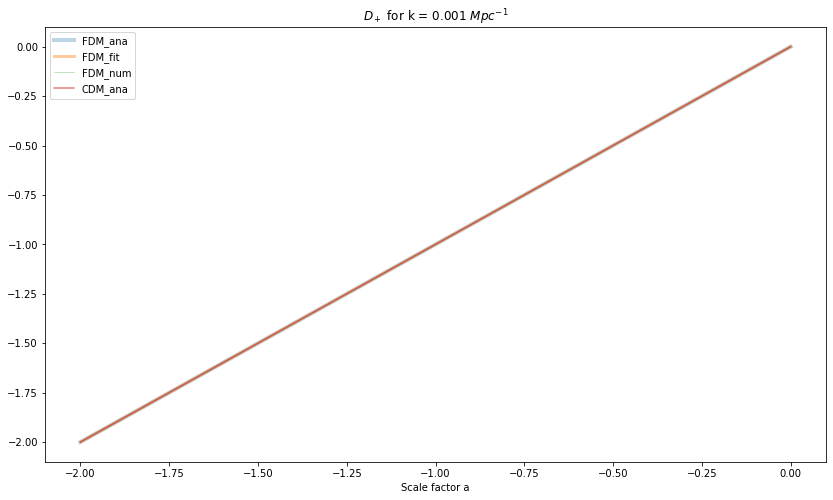

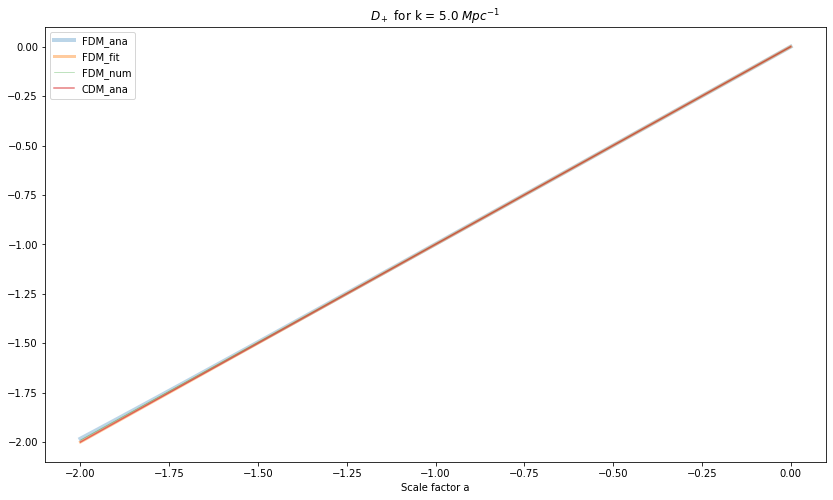

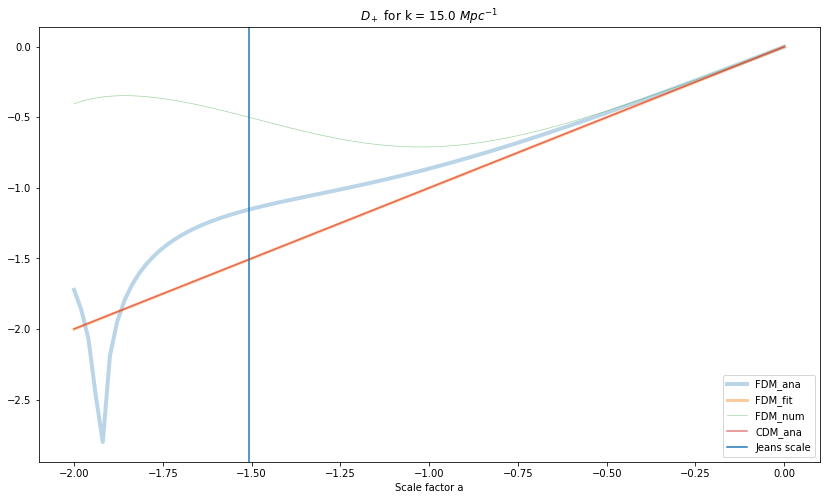

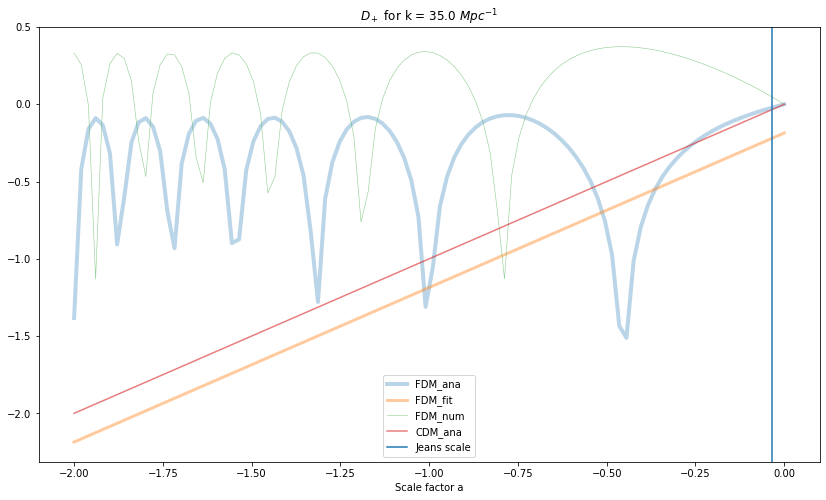

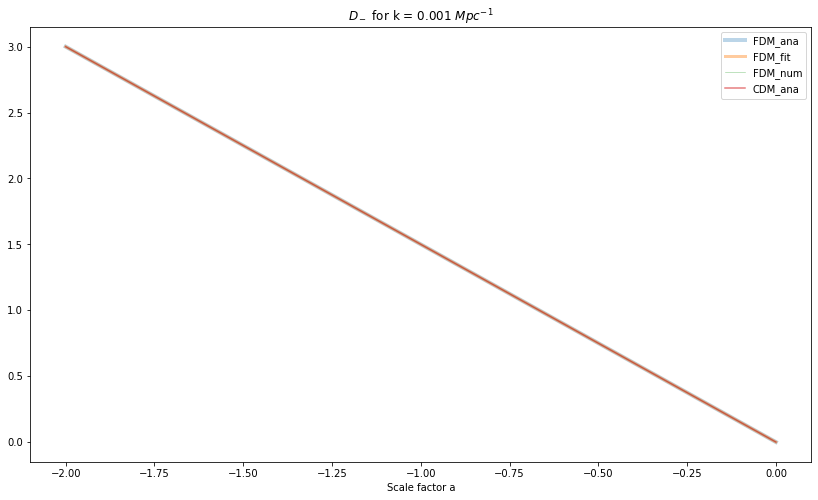

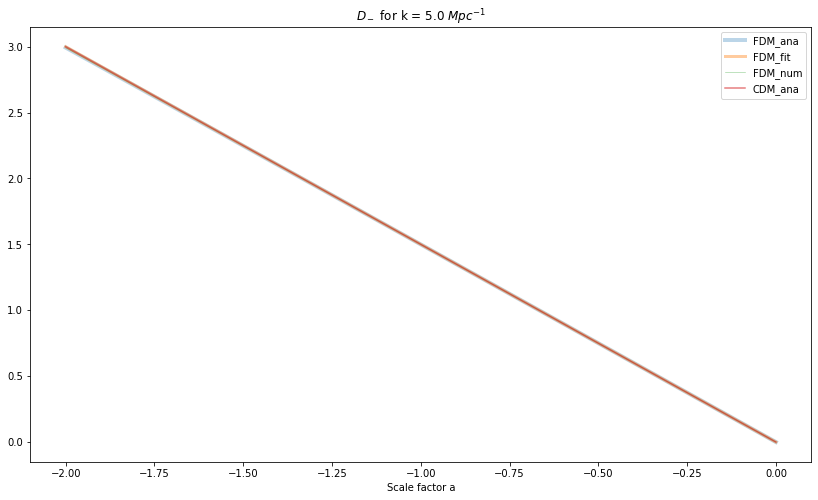

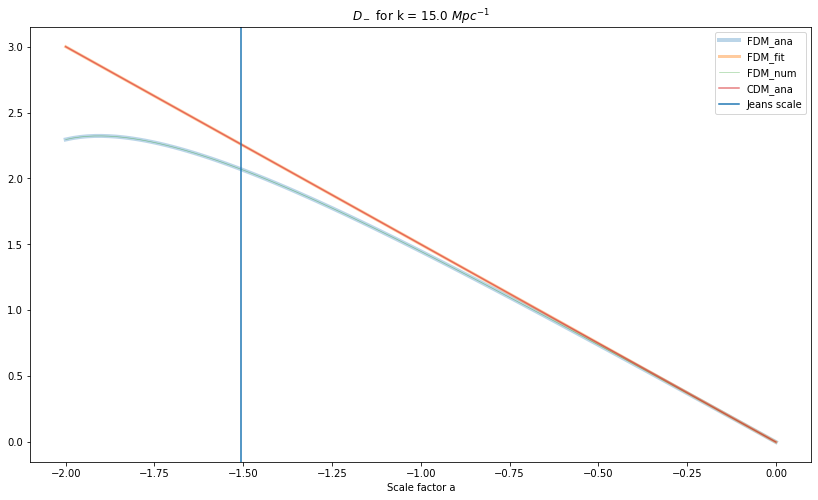

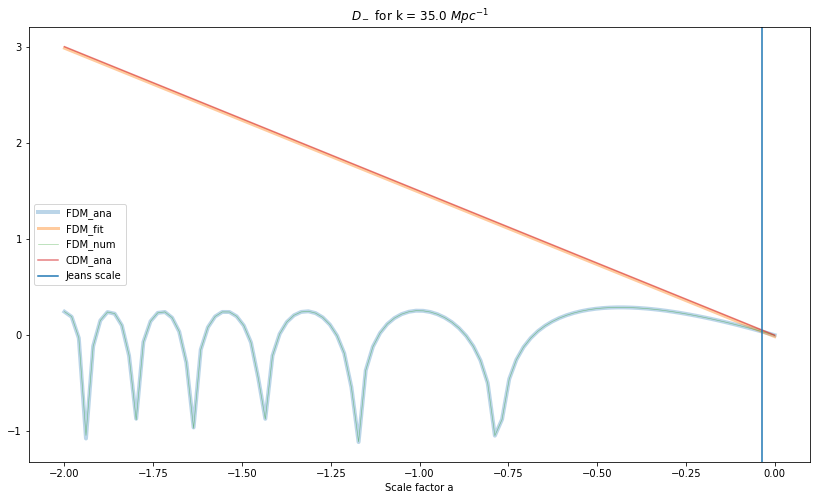

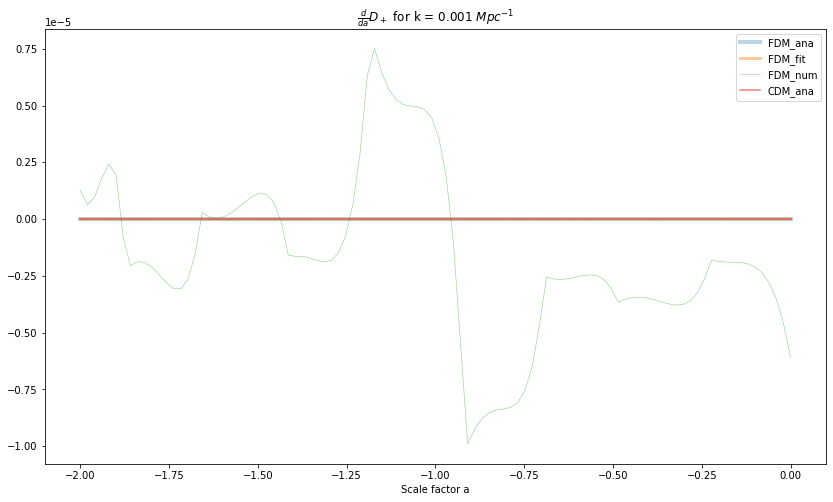

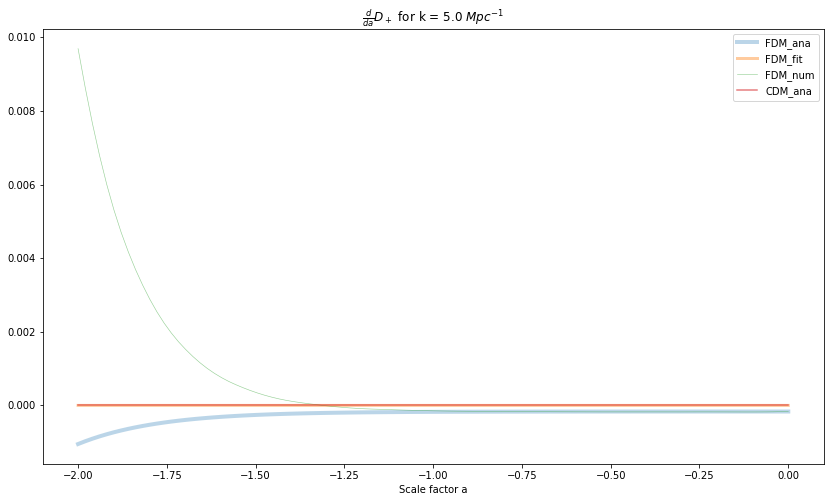

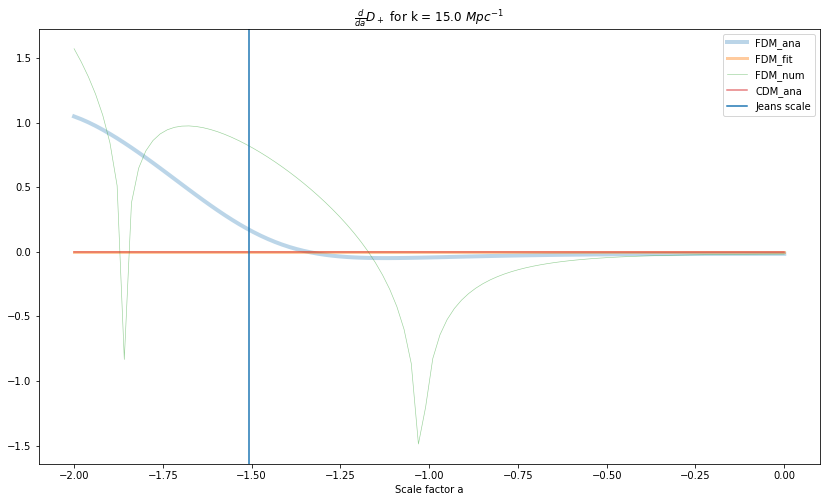

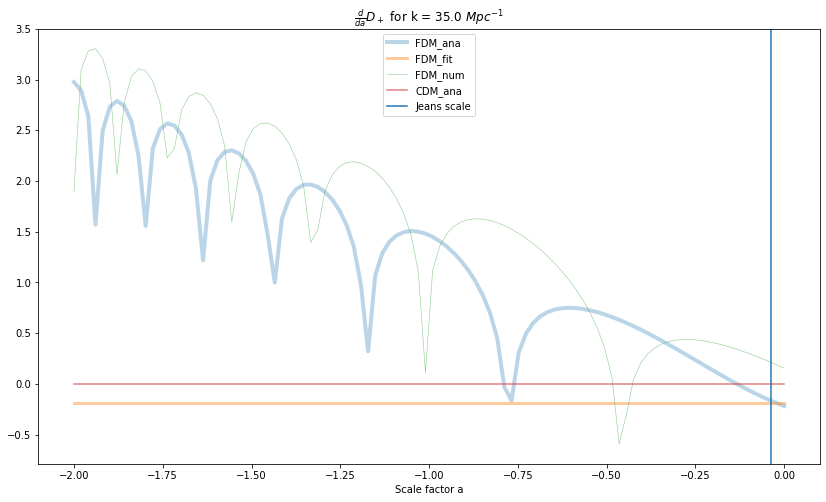

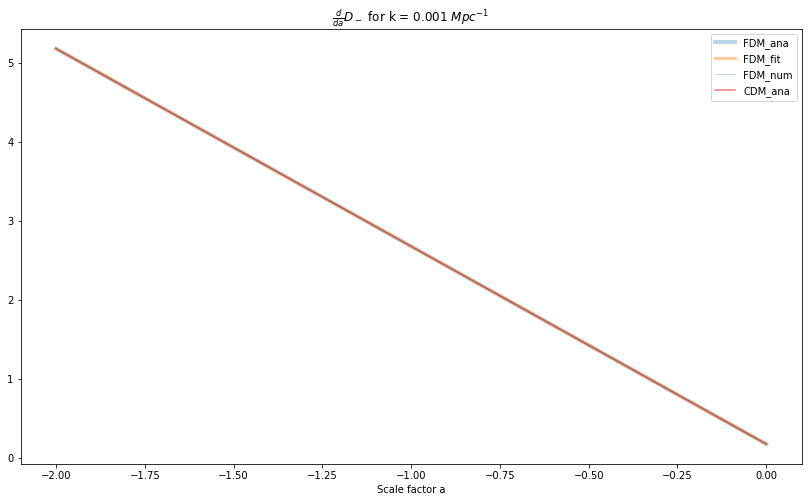

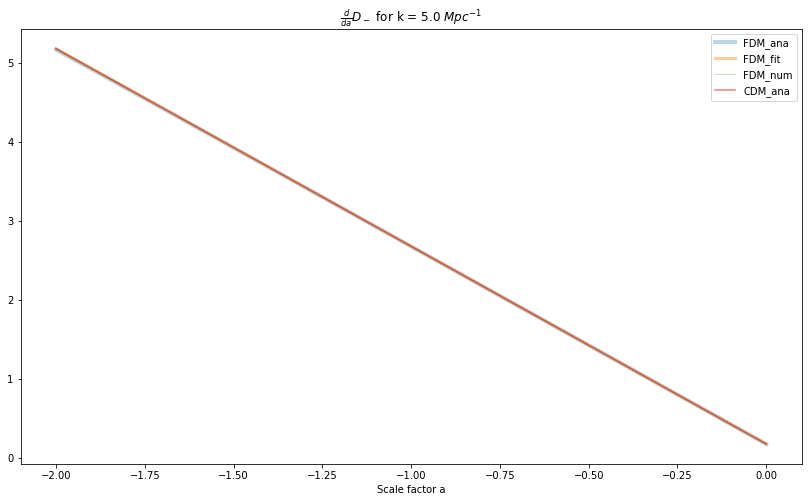

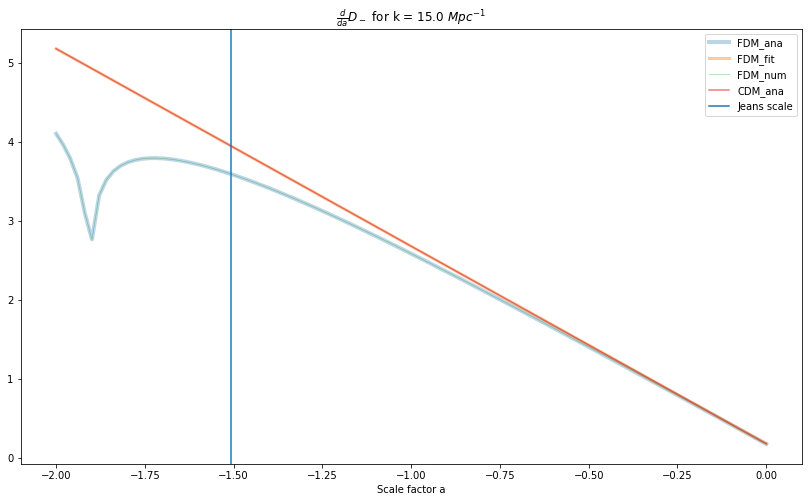

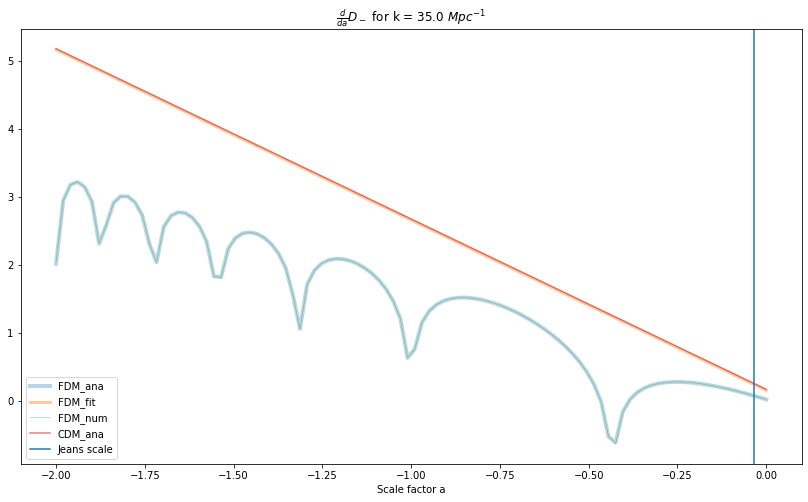

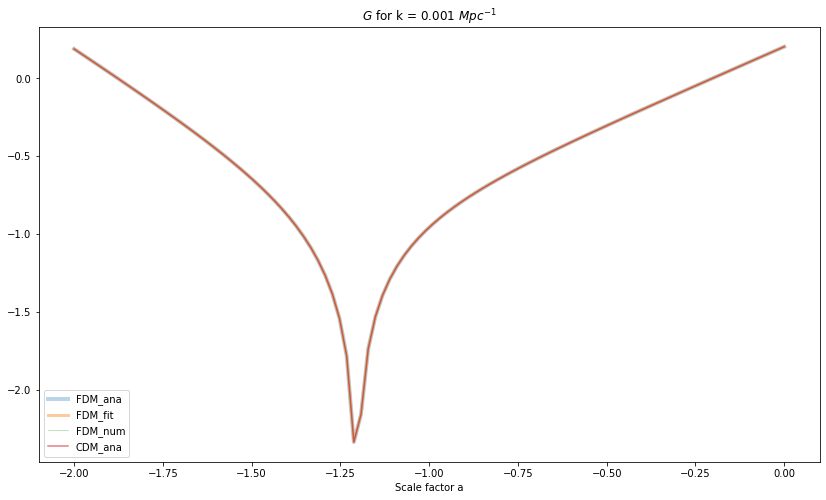

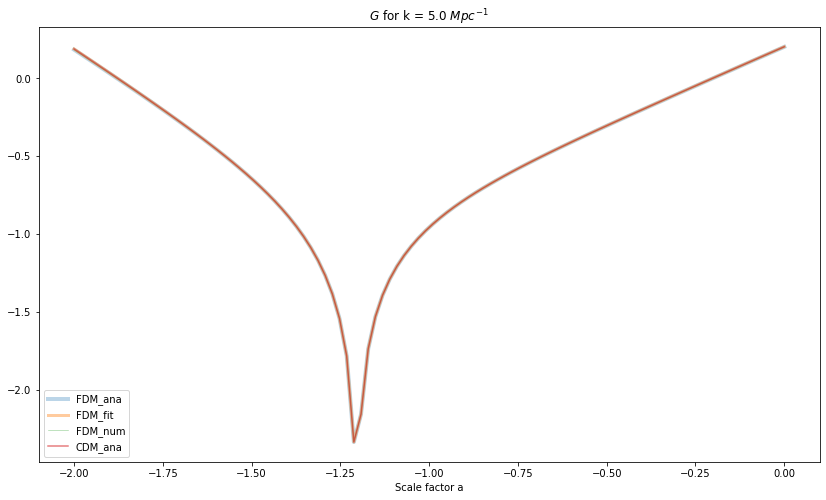

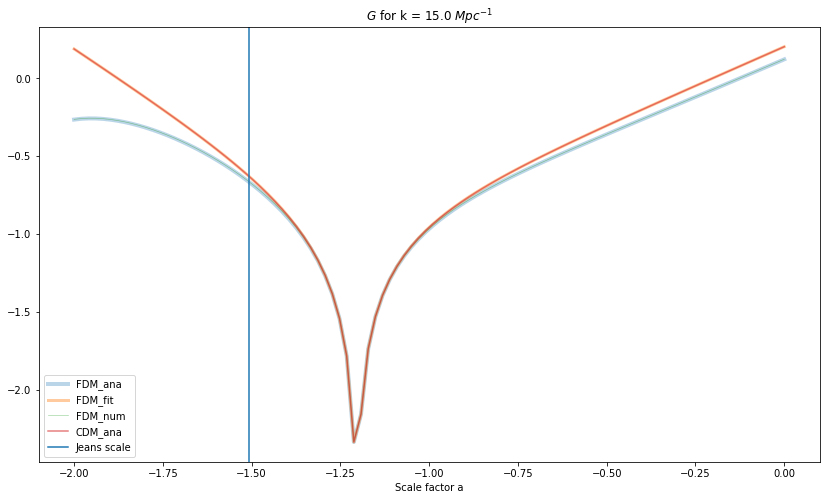

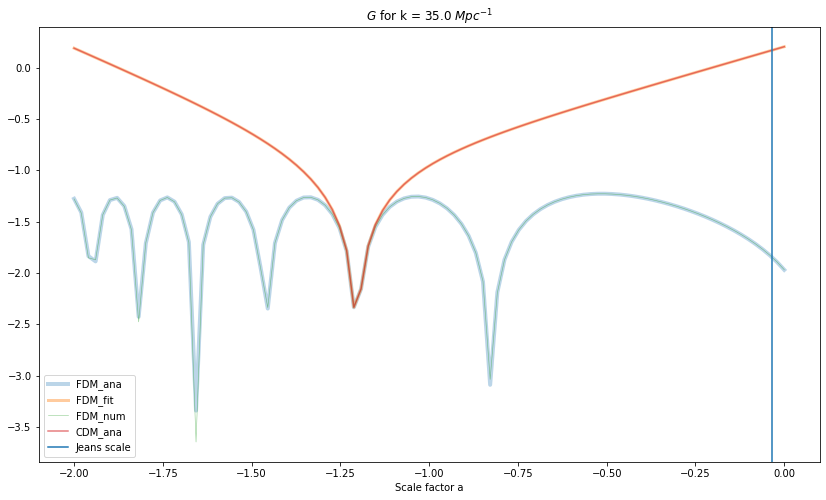

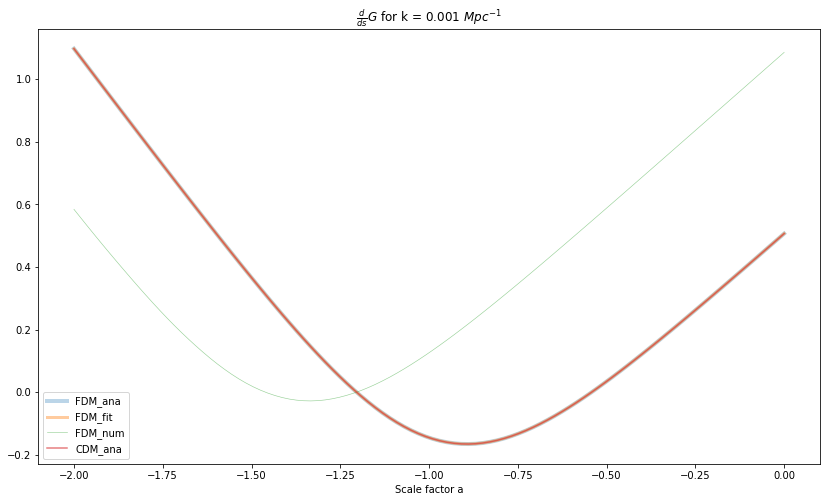

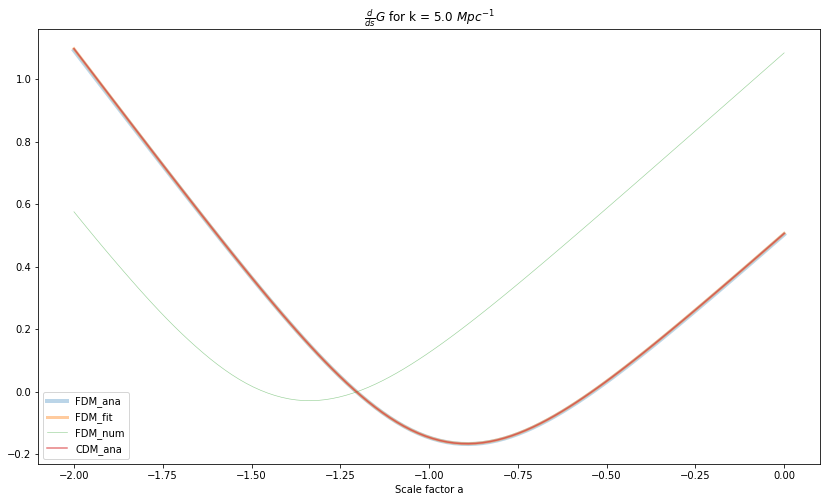

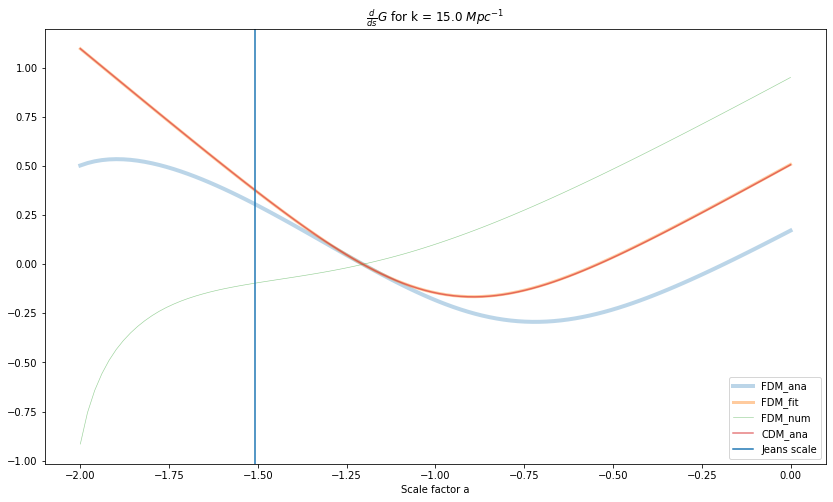

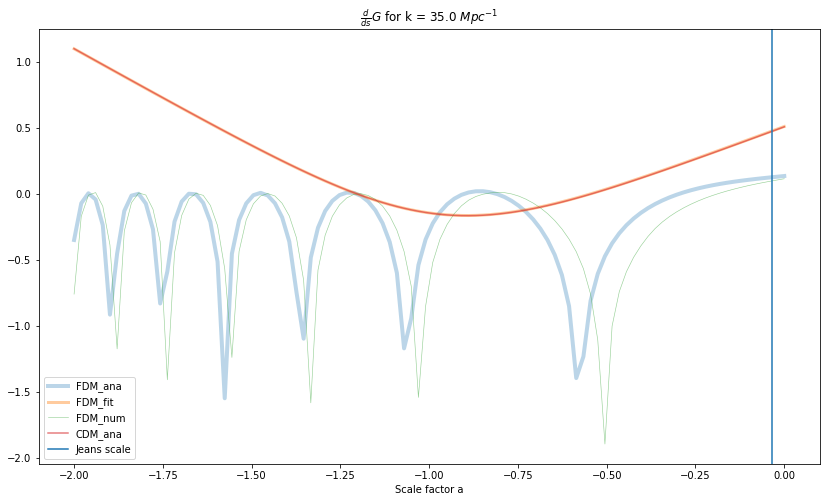

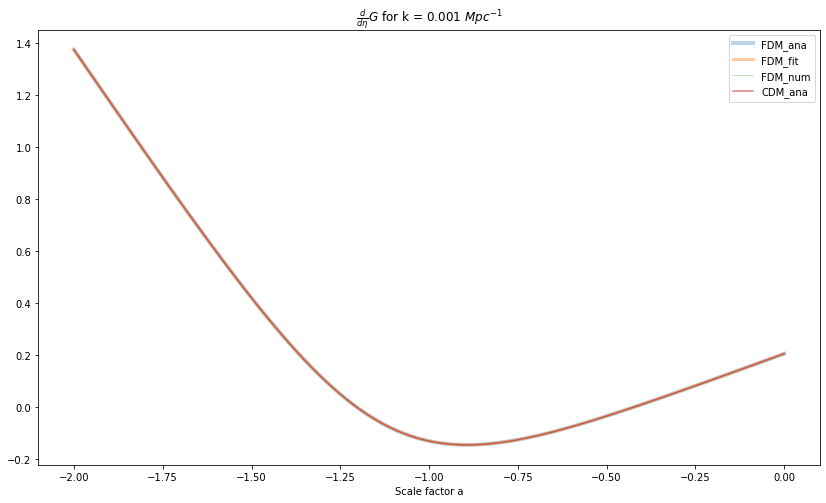

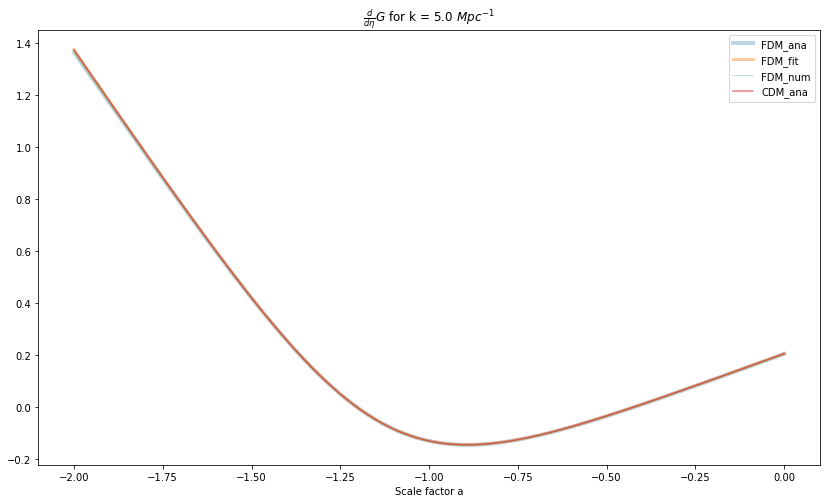

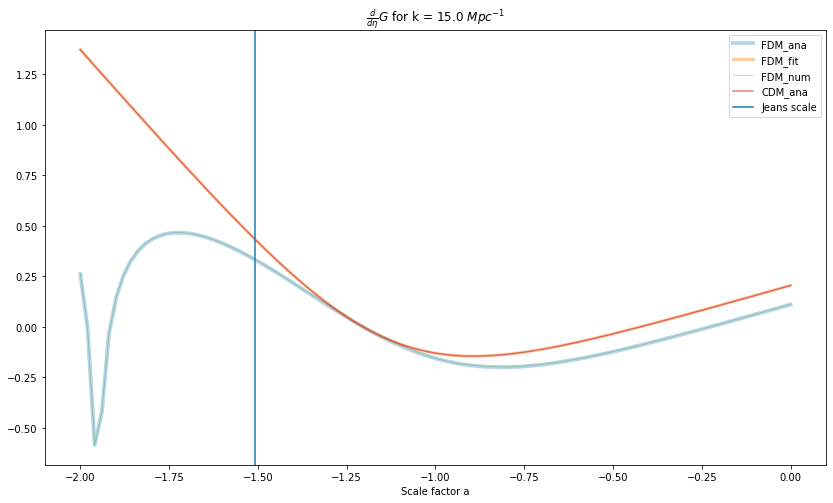

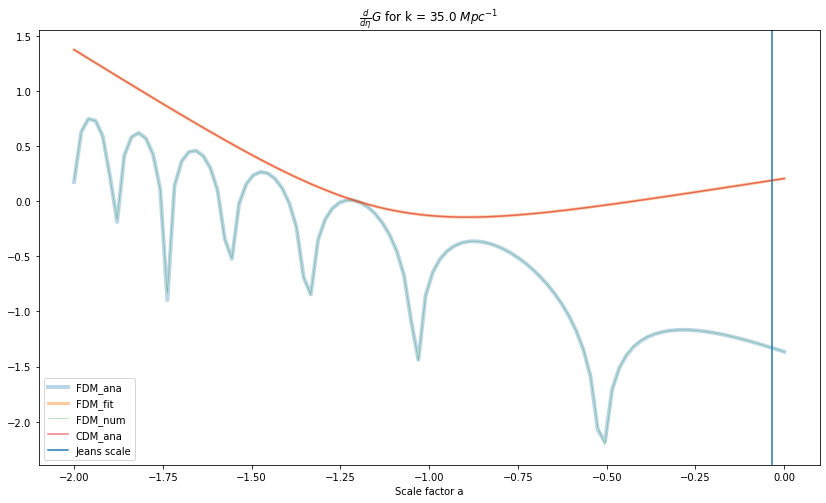

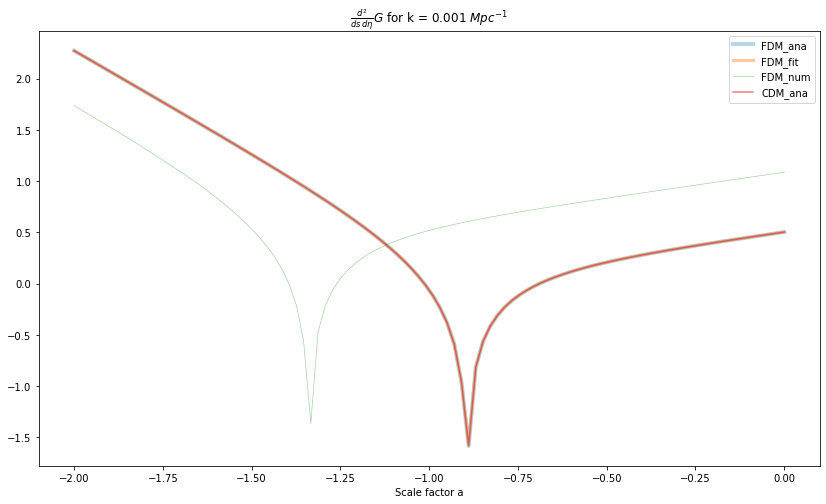

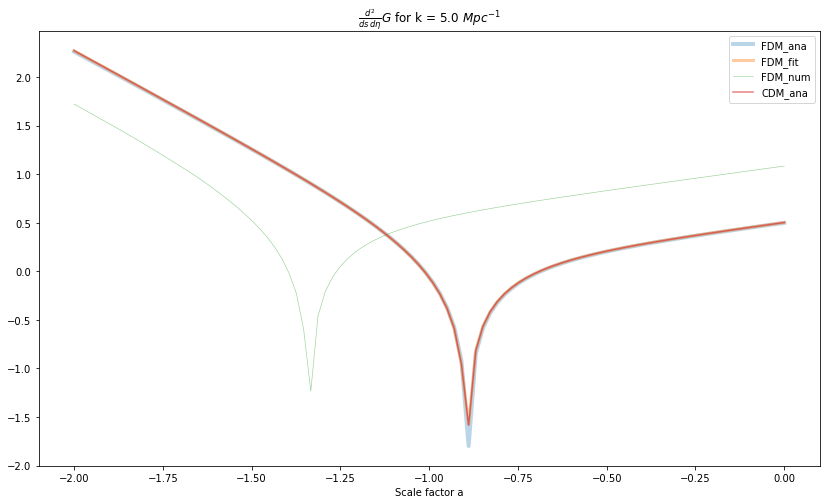

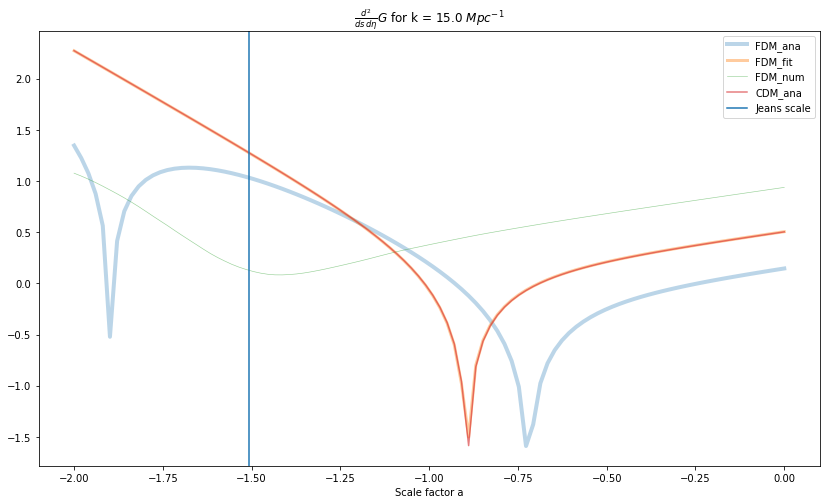

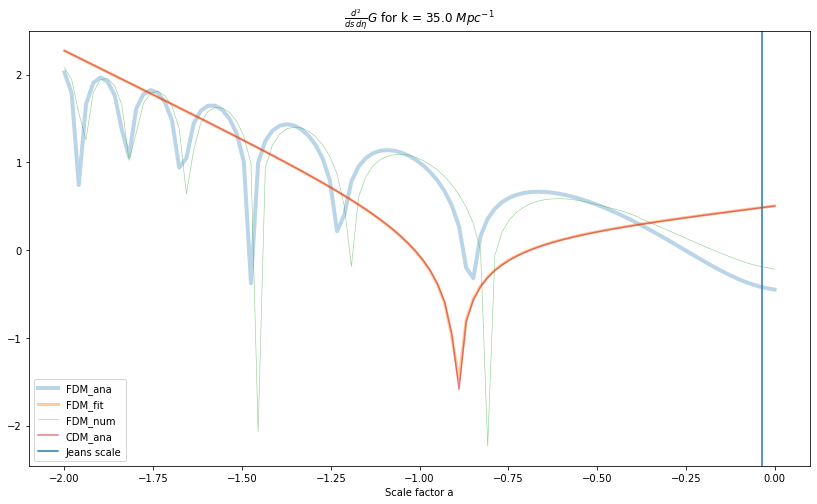

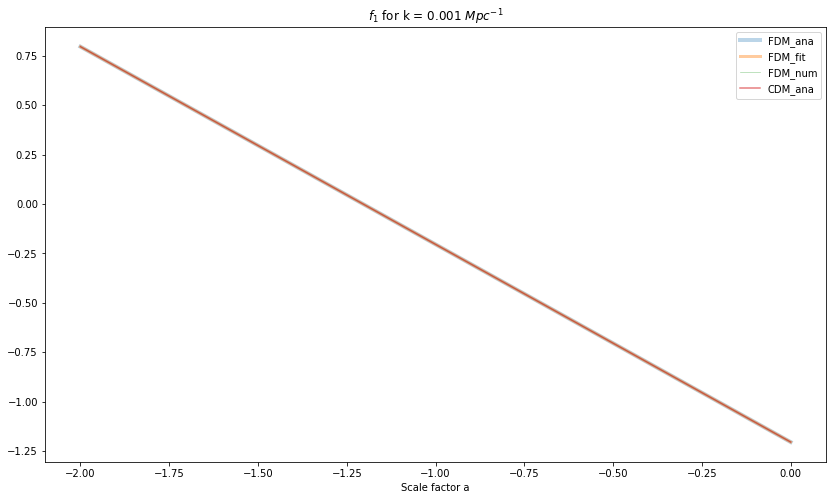

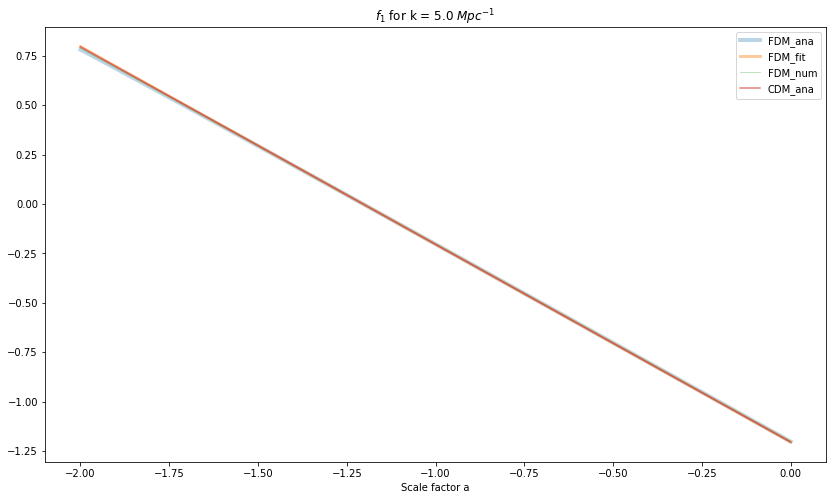

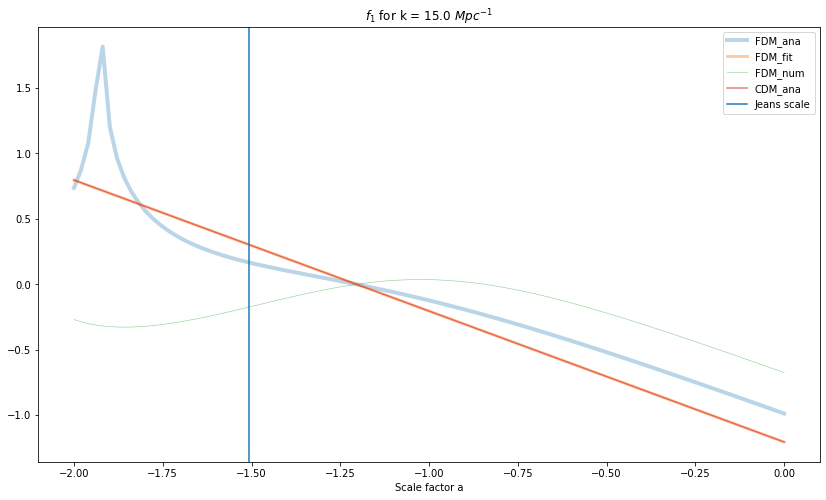

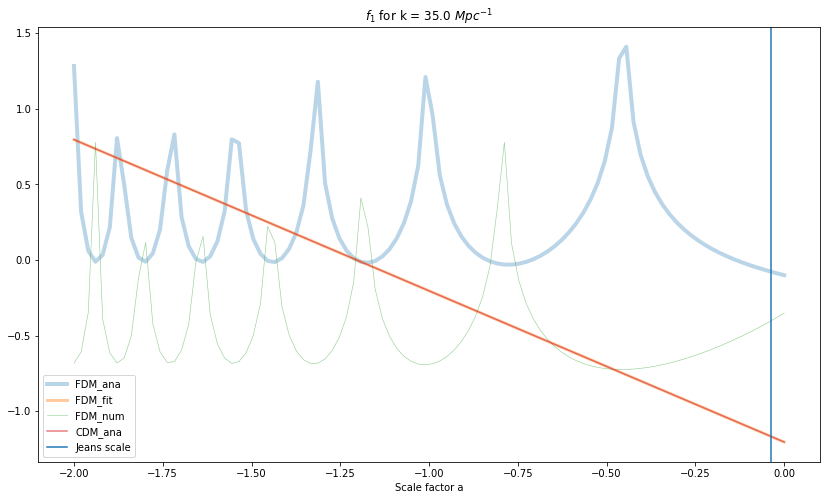

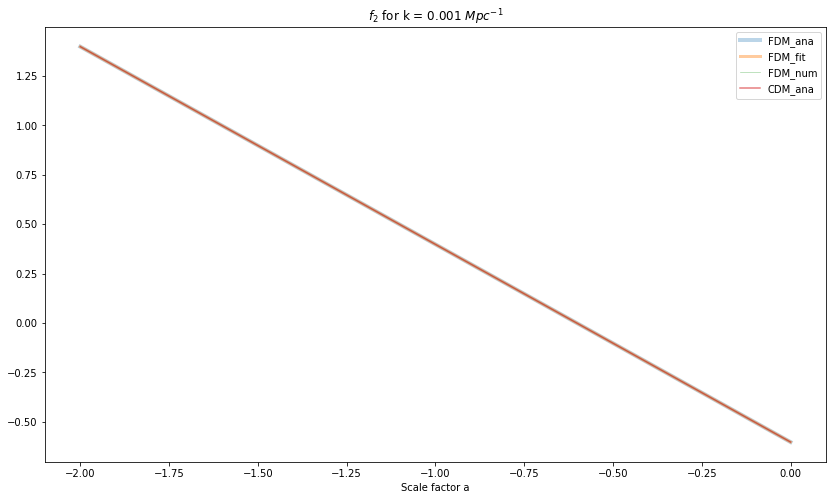

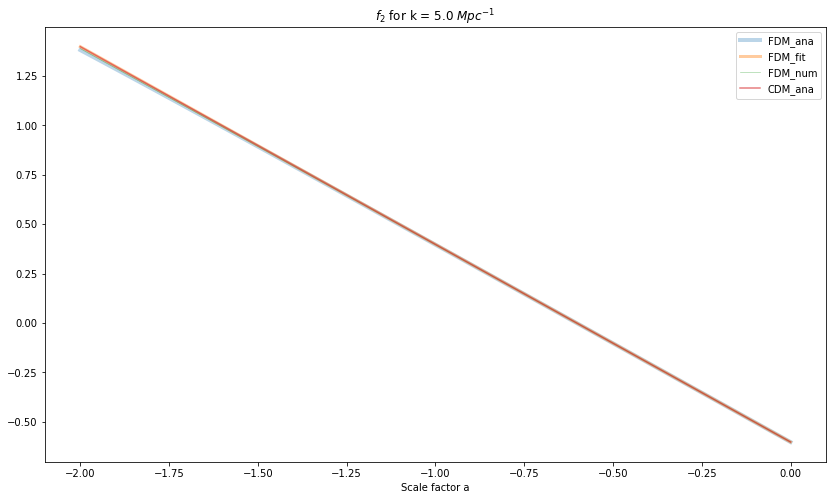

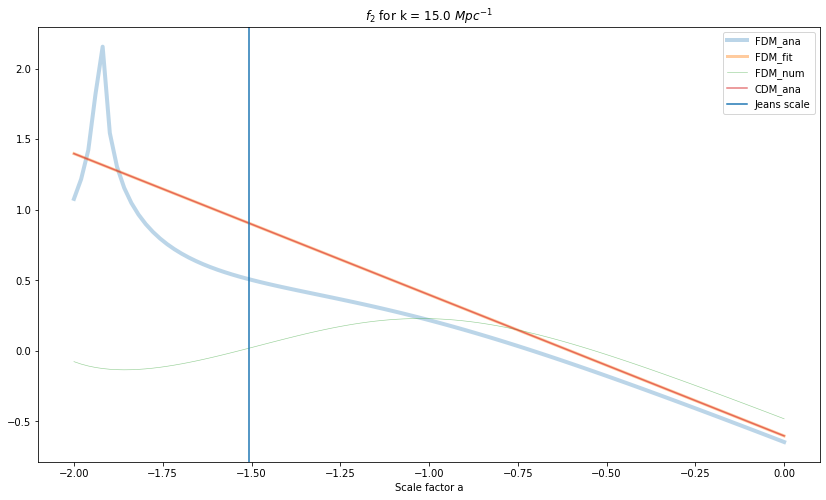

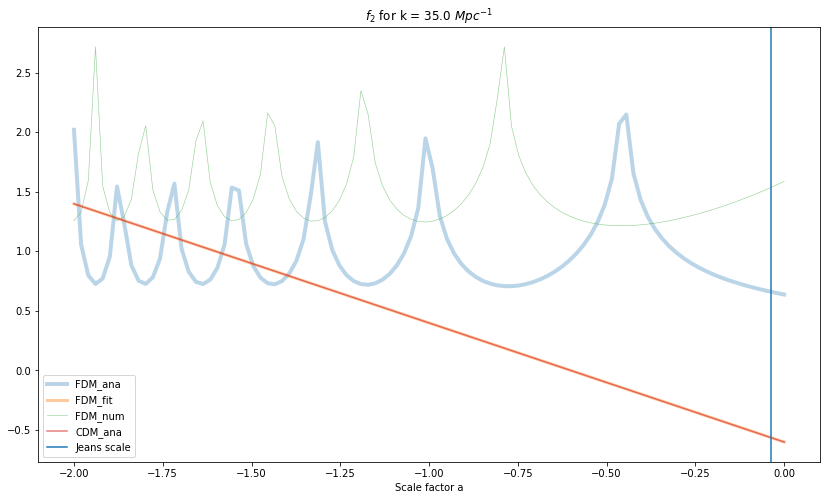

In [20]:
alphas = np.array([0.3, 0.4, 0.5, 0.6, 0.9, 1.0])
linewidths = np.array([4, 3, 0.6, 1.5, 0.5, 0.4])
for m, title in enumerate(titles):
    for i, k in enumerate(k_vec):
        plt.figure(figsize=(14,8))
        plt.title(title + get_momentum_label(k))
        plt.xlabel("Scale factor a")
        for l, label in enumerate(labels):
            plt.plot(np.log10(a_s), np.log10(np.abs(results[m, l, i, :])), alpha = alphas[l], lw = linewidths[l], label=label)
        if aj_vec[i] > a_s[0]:
            plt.axvline(x = np.log10(aj_vec[i]), label="Jeans scale")
        plt.legend()
        plt.show()
        #plt.savefig(f"/home/xerox/Documents/Masterarbeit/figures_for_bjoern/{title + get_momentum_label(k)}.png")

### 3D Plots for growth landscape

In [22]:
import cdm.growth.analytical     as cga
import cdm.growth.numerical      as cgn 
import fdm.growth.analytical     as fga
import fdm.growth.fit            as fgf
import fdm.growth.numerical      as fgn
import fdm.growth.renormalised   as fgr
import fdm.util 
import constants

import numpy as np
import matplotlib.pyplot as plt

# Make data.
N_k = 50
N_a = 500
k_vec = np.logspace(-4, 4, N_k)
a_vec = np.logspace(-2, 0, N_a)
D_num_vec    = np.zeros((N_k, N_a), dtype=float)
D_ana_vec    = np.zeros((N_k, N_a), dtype=float)
D_ren_vec    = np.zeros((N_k, N_a), dtype=float)
D_cdm_vec    = np.zeros((N_k, N_a), dtype=float)

a_in = constants.A_IN
m    = constants.FDM_M 

def get_momentum_label(k):
    return f" for k = {k}" + r" $Mpc^{-1}$"

growth_namespaces   = [fga, fgr,  fgn, fgf, cga]

titles =[   r"$D_+$", 
            r"$D_-$", 
        ]

labels =["F_a", "F_r",  "F_n", "F_f", "C_a"]

Z = np.zeros((len(titles), len(growth_namespaces), len(k_vec), len(a_vec)))


for j, a in enumerate(a_vec):
    for i, k in enumerate(k_vec):
        for l, module in enumerate(growth_namespaces):
            Z[0, l, i, j] = module.D_plus   (k, a, a_in, m)
            Z[1, l, i, j] = module.D_minus  (k, a, a_in, m)


X, Y = np.meshgrid(np.log10(a_vec), np.log10(k_vec))
Z_old = Z.copy()

In [5]:
import constants as c 

for i, k in enumerate(k_vec):
    D1, dD1, D2, dD2, temp1, temp2 = fgn.numerical_D(k, c.A_IN, c.FDM_M, debug = False, hubble = c.hubble, dlogHubble = c.dloghubble)

    Z[0, 2, i, :] = D1
    Z[1, 2, i, :] = D2

Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465615, -0.0014779730447904854) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D+: (1, 101.00000000012501) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465615, -0.0014779730447904854) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D+: (1, 101.00000000012501) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465615, -0.0014779730447904854) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D+: (1, 101.00000000012501) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0

/home/xerox/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465615, -0.0014779730447904854) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D+: (1, 101.00000000012501) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465615, -0.0014779730447904854) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D+: (1, 101.00000000012501) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0.0009853407604465615, -0.0014779730447904854) at a_in = 1000
Integrate FDM D+ for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D+: (1, 101.00000000012501) at a_in = 0.009900990099009901
Integrate FDM D- for O_m = 1.0 and H_0 = 0.68 at a_in = 0.009900990099009901
IC for FDM D-: (0

KeyboardInterrupt: 

In [4]:
def getJeansScalePoints():
    m = 1e-23
    x = []
    y = []
    for j, a in enumerate(a_vec):
        dlogk = np.log(k_vec[1]) - np.log(k_vec[0])
        kj = fdm.util.lague_kj(a, m)
        i_jeans = int((np.log(kj) - np.log(k_vec[0]))/dlogk)
        x.append(j)
        y.append(i_jeans)

    return np.array(x), np.array(y)

In [23]:
Z = np.load("z_used_for_suppression_map.npy")

[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]


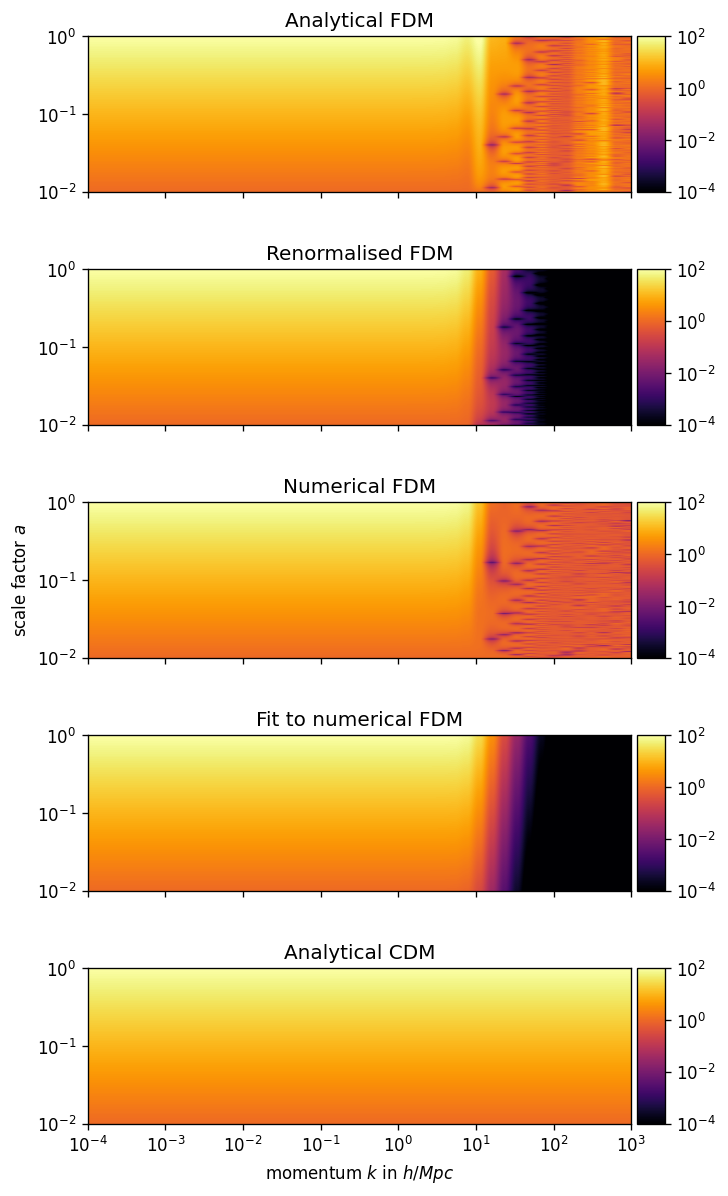

[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]
[-4.0, 4.0, -2.0, 0.0]


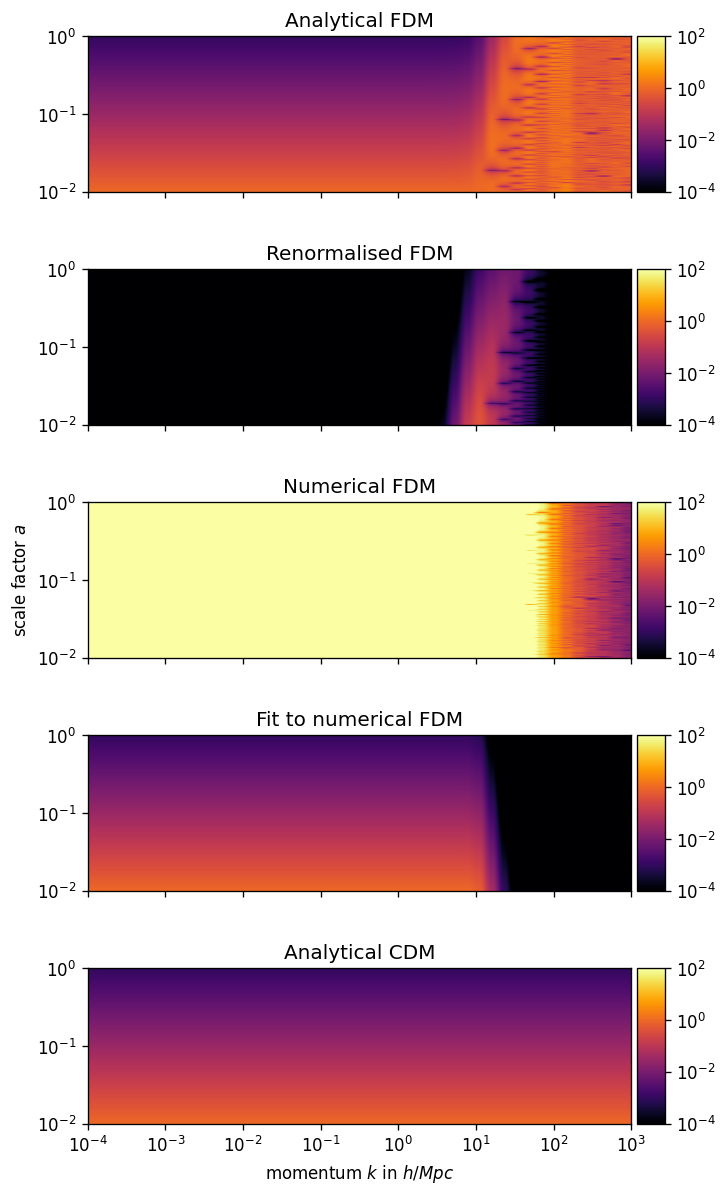

In [24]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable

titles =[   r"$D_+(k, a)$",
            r"$D_-(k, a)$", 
        ]

labels =[
        r"Analytical FDM", 
        r"Renormalised FDM", 
        r"Numerical FDM", 
        r"Fit to numerical FDM",
        r"Analytical CDM"]

plotJeans = True 

for m, title in enumerate(titles):
    fig, axes = plt.subplots(len(labels), 1, sharex="all")
    for l, label in enumerate(labels):
        ax = axes[l]

        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)

        ax.set_title(label)
        fig.set_size_inches(8, 12)
        fig.set_dpi(120)

        ax.set_xlim([-4, 3])
        ax.set_yticks([-2, -1, 0], ["$10^{-2}$", "$10^{-1}$", "$10^{0}$"])
    

        #ax.set_zlabel(r"$D(a, k)$")
        logZ = np.log10(np.abs(Z[m, l, :, :]))
        loga = np.log10(a_vec)
        logk = np.log10(k_vec)
        extent = [logk.min(), logk.max(), loga.min(), loga.max()]
        print(extent)
        L_k    = extent[1] - extent[0]
        L_a    = extent[3] - extent[2]
        
        im = ax.imshow(logZ.T, origin='lower', cmap='inferno', 
                    extent=extent, vmin=-4, vmax=2)

        cbar = fig.colorbar(im, cax=cax, orientation='vertical')
        cbar.set_ticks([-4, -2, 0, 2], labels= ["$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$"])

        fig.subplots_adjust(hspace=0.5)
        #fig.colorbar(ax, shrink=1, aspect=5)
    axes[-1].set_xlabel(r"momentum $k$ in $h/Mpc$")
    axes[-1].set_xticks([-4, -3, -2, -1, 0, 1, 2, 3], ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$", "$10^{2}$", "$10^{3}$"])
        
    axes[2].set_ylabel(r"scale factor $a$")

    plt.savefig(f"../../figures/suppresion_map_{m}.pdf")
    plt.show()

### Coupling kernels

In [1]:
import cdm.coupling 
import cdm.num_coupling 
import fdm.coupling 
import matplotlib.pyplot as plt 
import numpy as np

def get_vectors(ctheta, k1, k):
    k1_vec = k1 * np.array([0, 0, 1])
    k_vec  = k * np.array([np.sqrt(1 - ctheta**2), 0, ctheta])
    k2_vec = k_vec - k1_vec
    k2     = np.linalg.norm(k2_vec)
    return k1_vec, k2_vec, k2, k_vec


def plotF2(F21, F22, title):
    plt.figure(figsize=(8,8))
    plt.xscale("log")
    sc1 = plt.scatter(x, y, s = np.abs(F21), c = np.abs(F21))
    plt.colorbar(sc1)
    if F22 is not None:
        sc2 = plt.scatter(x, y, s = np.abs(F22), c = np.abs(F22), cmap="cool", edgecolors='black')
        plt.colorbar(sc2)

    plt.ylim(-0.1, 1.25)
    plt.xlim(1e-6, 1e3)
    plt.xlabel("Momentum k")
    plt.ylabel(r"$\cos(\theta)$")
    plt.title(title)
    plt.show()

Integrate CDM D+ for O_m = 0.3 and H_0 = 1 at a_in = 0.009900990099009901
Integrate CDM IC for O_m = 0.3 and H_0 = 1 at a_in = 0.009900990099009901
Integrate CDM D- for O_m = 0.3 and H_0 = 1 at a_in = 0.009900990099009901


/home/xerox/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


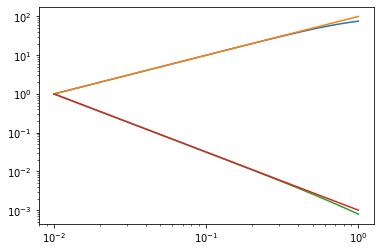

In [10]:
av = np.logspace(-2, 0)
y = [cdm.couplings.numerical.D_plus(2, a, 0.01, 0) for a in av]
y2 = [cdm.couplings.numerical.D_minus(2, a, 0.01, 0) for a in av]
import matplotlib.pyplot as plt 
plt.loglog(av, y)
plt.loglog(av, (av/0.01))
plt.loglog(av, y2)
plt.loglog(av, (av/0.01)**(-3/2))

In [2]:
import constants as c


N = 100
eta = 2
m = 1e-23
k1_s = np.logspace(2, -4, N)
ctheta_s = np.linspace(1-1e-4, -1+1e-4, N)
k = 1e-3

f2_cdm = np.zeros((N, N))
f2_cdm_td = np.zeros((N, N))
f2_fdm = np.zeros((N, N))

x, y = [], []
for i, k1 in enumerate(k1_s):
    for j, ctheta in enumerate(ctheta_s):
        x.append(k1)
        y.append(ctheta)
        k1_vec, k2_vec, k2, k_vec = get_vectors(ctheta, k1, k)

        f2_cdm[i, j]    = cdm.coupling.F2s(k1_vec, k2_vec, c.ETA_FIN, m)
        f2_cdm_td[i, j] = cdm.num_coupling.F2s(k1_vec, k2_vec, c.ETA_FIN, 0).nominal_value
        f2_fdm[i, j]    = fdm.coupling.F2s(k1_vec, k2_vec, c.ETA_FIN, m).nominal_value

np.savez("f2_comparison_de_new.npz", f2_cdm = f2_cdm, f2_cdm_td = f2_cdm_td, f2_fdm = f2_fdm)


/home/xerox/Documents/Masterarbeit/fdm-eulerpt/python/src/fdm/coupling.py:176: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(integrand, constants.ETA_IN, eta, epsabs = 1e-4, epsrel = 1e-4, limit=5000)


In [7]:
np.sum(f2_cdm == 0) / np.sum(f2_cdm != -20)

0.3177

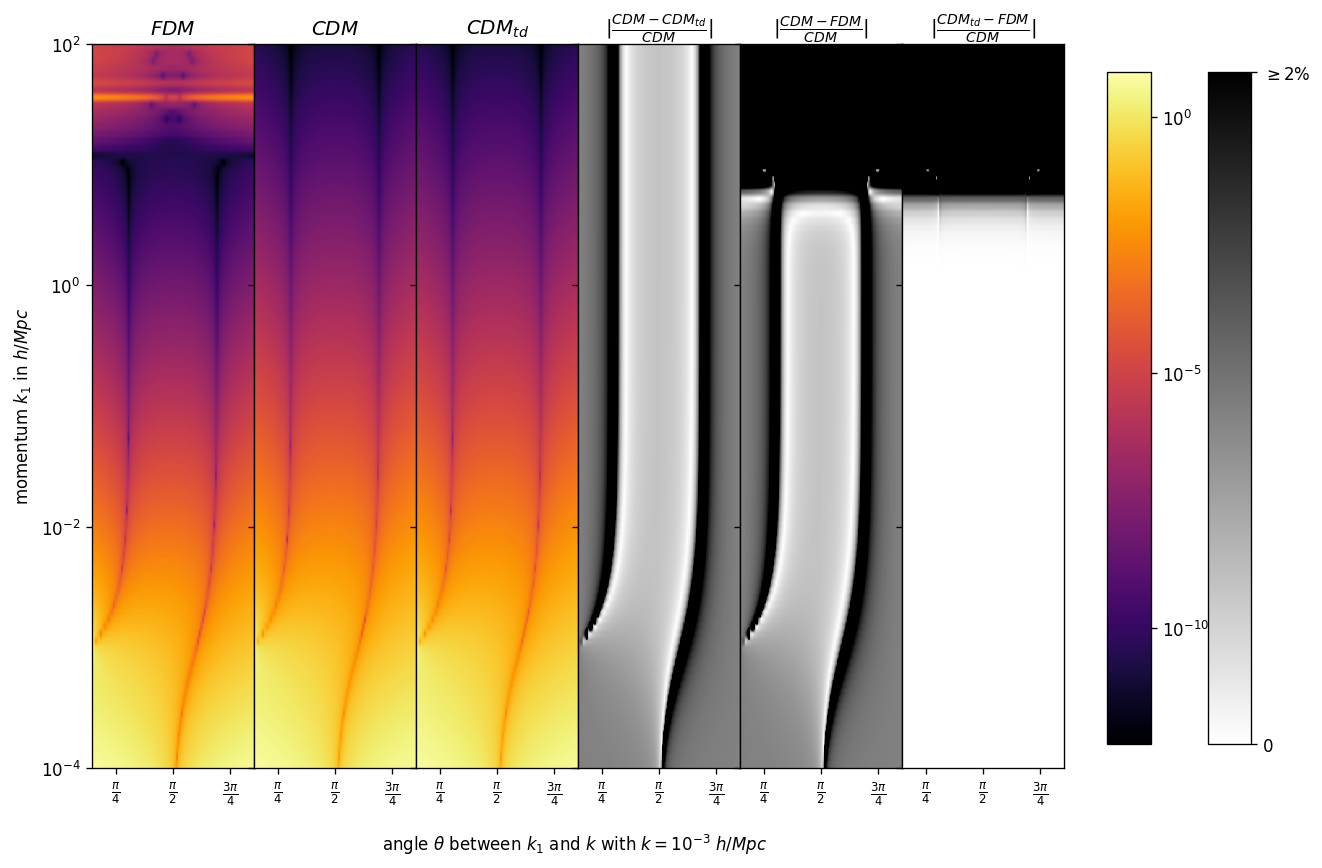

In [18]:
fig = plt.figure(figsize=(12, 8), dpi = 120)
gs = fig.add_gridspec(1, 6, wspace=0)
ax = gs.subplots(sharey=True)

im1 = ax[0].imshow(np.log10(np.abs(f2_fdm)), cmap="inferno",                   extent = [1, -1, -4, 2], aspect="auto")
im1 = ax[1].imshow(np.log10(np.abs(f2_cdm)), cmap="inferno",                   extent = [1, -1, -4, 2], aspect="auto")
im3 = ax[2].imshow(np.log10(np.abs(f2_cdm_td)), cmap="inferno",                extent = [1, -1, -4, 2], aspect="auto")
im2 = ax[3].imshow(np.abs(f2_cdm_td - f2_cdm)/(np.abs(f2_cdm)), cmap="binary", vmin=0, vmax=0.02,           extent = [1, -1, -4, 2], aspect="auto")
im2 = ax[4].imshow(np.abs(f2_cdm    - f2_fdm)/(np.abs(f2_cdm)), cmap="binary", vmin=0, vmax=0.02,           extent = [1, -1, -4, 2], aspect="auto")
im2 = ax[5].imshow(np.abs(f2_cdm_td - f2_fdm)/(np.abs(f2_cdm)), cmap="binary", vmin=0, vmax=0.02,           extent = [1, -1, -4, 2], aspect="auto")

ax[0].title.set_text("$FDM$")
ax[1].title.set_text("$CDM$")
ax[2].title.set_text("$CDM_{td}$")
ax[3].title.set_text(r"$|\frac{CDM - CDM_{td}}{CDM}|$")
ax[4].title.set_text(r"$|\frac{CDM - FDM}{CDM}|$")
ax[5].title.set_text(r"$|\frac{CDM_{td} - FDM}{CDM}|$")
ax[0].set_ylabel(r"momentum $k_1$ in $h/Mpc$")
fig.text(0.46, 0.04, r"angle $\theta$ between $k_1$ and $k$ with $k = 10^{-3}$ $h/Mpc$", ha='center')
for a in ax:
    a.set_yticks([-4, -2, 0, 2])
    a.set_yticklabels(["$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$"])
    a.set_xticks([np.sqrt(2)/2, 0, -np.sqrt(2)/2])
    a.set_xticklabels([r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$"])


fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.83, 0.15, 0.03, 0.7])
cbar_ax2 = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar1 = fig.colorbar(im3, cax=cbar_ax1, ticks=[-10, -5, 0])
cbar2 = fig.colorbar(im2, cax=cbar_ax2, ticks=[0, 0.02])
cbar1.ax.set_yticklabels(["$10^{-10}$", "$10^{-5}$", "$10^{0}$"])
cbar2.ax.set_yticklabels(["0", "$\geq 2\%$"])
#plt.colorbar(ax = ax[0])
plt.savefig("../../figures/k=1e-3m=23_f2_comparison.pdf")
plt.show()

### The MD block

In [ ]:
import pandas as pd 

data = pd.DataFrame()

x, y = [], []
for k1 in k1_s:
    for ctheta in ctheta_s:
        x.append(k1)
        y.append(ctheta)
        k1_vec, k2_vec, k2, k_vec = get_vectors(ctheta, k1, k)

        a = cdm.num_coupling.F2s(k1_vec, k2_vec, 2, m)
        b = cdm.coupling.F2s(k1_vec, k2_vec, 2, m)
        c = fdm.coupling.F2s(k1_vec, k2_vec, 2, m)
        
        datum = {
            "k1": k1,
            "cosine theta": ctheta, 
            "CDM F2s num": a,
            "FDM F2s num": c,
            "CDM F2s ana": b
        }

        data = data.append(datum, ignore_index=True)

data["CC Delta_r"] = np.abs(data["CDM F2s ana"] - data["CDM F2s num"])/data["CDM F2s ana"]
data["CF Delta_r"] = np.abs(data["FDM F2s num"] - data["CDM F2s ana"])/data["CDM F2s ana"]
data

In [2]:
import pandas as pd 

data = pd.DataFrame()

x, y = [], []
for k1 in k1_s:
    for ctheta in ctheta_s:
        x.append(k1)
        y.append(ctheta)
        k1_vec, k2_vec, k2, k_vec = get_vectors(ctheta, k1, k)

        a = cdm.num_coupling.F2s(k1_vec, k2_vec, 2, m)
        b = cdm.coupling.F2s(k1_vec, k2_vec, 2, m)
        c = fdm.coupling.F2s(k1_vec, k2_vec, 2, m)
        
        datum = {
            "k1": k1,
            "cosine theta": ctheta, 
            "CDM F2s num": a,
            "FDM F2s num": c,
            "CDM F2s ana": b
        }

        data = data.append(datum, ignore_index=True)

data["CC Delta_r"] = np.abs(data["CDM F2s ana"] - data["CDM F2s num"])/data["CDM F2s ana"]
data["CF Delta_r"] = np.abs(data["FDM F2s num"] - data["CDM F2s ana"])/data["CDM F2s ana"]
data

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:176: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=1000)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:176: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=1000)


CDM F2s ana                                   CDM F2s num  \
0      0.214286       0.2132857007242859+/-0.0000000000000024   
1   1250.232142            1237.730892013720+/-0.000000000014   
2   2500.285718            2475.283717896095+/-0.000000000027   
3   3750.375019              3712.87176863158+/-0.00000000004   
4   5000.500050              4950.49504950495+/-0.00000000005   
5      0.214284       0.2132835700214427+/-0.0000000000000024   
6     39.760583            39.3640502789149+/-0.0000000000004   
7     79.342766            78.5501984019345+/-0.0000000000009   
8    118.961004           117.7718965660451+/-0.0000000000013   
9    158.615469           157.0293144714795+/-0.0000000000017   
10     0.212164       0.2111739632248940+/-0.0000000000000023   
11     1.478795         1.465122756696428+/-0.000000000000016   
12     2.786499         2.759576128728415+/-0.000000000000031   
13     4.142442           4.10159883139535+/-0.00000000000005   
14     5.555556           5.50000000000000+/-0.00000000000006   
15     0.019481     0.01938960935064935+/-0.00000000000000022   
16     0.022208     0.02209938427991669+/-0.00000000000000025   
17     0.014643     0.01460636703729976+/-0.00000000000000016   
18    -0.011015    -0.01082466920816068+/-0.00000000000000013   
19    -0.073124      -0.0723925271309261+/-0.0000000000000008   
20     0.000021   (2.132643764195009+/-0.000000000000024)e-05   
21     0.000017   (1.710937055859425+/-0.000000000000019)e-05   
22     0.000004     (3.90761308381553+/-0.00000000000008)e-06   
23    -0.000019  (-1.841564358948330+/-0.000000000000020)e-05   
24    -0.000051    (-5.00000000000003+/-0.00000000000006)e-05   

              FDM F2s num  cosine theta          k1  \
0         0.1822+/-0.0007          0.00    0.000100   
1            1151.1+/-1.9          0.25    0.000100   
2                2302+/-4          0.50    0.000100   
3                3453+/-6          0.75    0.000100   
4                4604+/-7          1.00    0.000100   
5         0.1822+/-0.0007          0.00    0.003162   
6            36.60+/-0.06          0.25    0.003162   
7            73.04+/-0.12          0.50    0.003162   
8           109.53+/-0.18          0.75    0.003162   
9           146.04+/-0.24          1.00    0.003162   
10        0.1804+/-0.0007          0.00    0.100000   
11        1.3468+/-0.0026          0.25    0.100000   
12          2.553+/-0.005          0.50    0.100000   
13          3.806+/-0.006          0.75    0.100000   
14          5.115+/-0.008          1.00    0.100000   
15      0.01664+/-0.00007          0.00    3.162278   
16      0.01901+/-0.00008          0.25    3.162278   
17      0.01210+/-0.00006          0.50    3.162278   
18   -0.011138+/-0.000013          0.75    3.162278   
19     -0.06727+/-0.00011          1.00    3.162278   
20    0.072262+/-0.000006          0.00  100.000000   
21    0.072077+/-0.000005          0.25  100.000000   
22    0.071885+/-0.000004          0.50  100.000000   
23  0.0716837+/-0.0000010          0.75  100.000000   
24    0.071475+/-0.000006          1.00  100.000000   

                                CC Delta_r        CF Delta_r  
0    0.004666720000000+/-0.000000000000011   0.1499+/-0.0035  
1    0.009999142982024+/-0.000000000000011   0.0793+/-0.0015  
2    0.009999657151184+/-0.000000000000011   0.0793+/-0.0015  
3    0.009999866661333+/-0.000000000000011   0.0793+/-0.0015  
4    0.010000000000000+/-0.000000000000011   0.0793+/-0.0015  
5    0.004666720000000+/-0.000000000000011   0.1499+/-0.0035  
6    0.009973010862237+/-0.000000000000011   0.0796+/-0.0015  
7    0.009989162909285+/-0.000000000000011   0.0794+/-0.0015  
8    0.009995776994793+/-0.000000000000011   0.0793+/-0.0015  
9    0.010000000000000+/-0.000000000000011   0.0793+/-0.0015  
10   0.004666720000000+/-0.000000000000011   0.1499+/-0.0035  
11   0.009245290566038+/-0.000000000000011   0.0893+/-0.0018  
12   0.009661975211267+/-0.000000000000011   0.0837+/-0.0016  


## Numerical F2 in MDU from eta_in = 0.2

In [2]:
import pandas as pd 

data = pd.DataFrame()

x, y = [], []
for k1 in k1_s:
    for ctheta in ctheta_s:
        x.append(k1)
        y.append(ctheta)
        k1_vec, k2_vec, k2, k_vec = get_vectors(ctheta, k1, k)

        a = cdm.num_coupling.F2s(k1_vec, k2_vec, 2, m)
        b = cdm.coupling.F2s(k1_vec, k2_vec, 2, m)
        c = fdm.coupling.F2s(k1_vec, k2_vec, 2, m)
        
        datum = {
            "k1": k1,
            "cosine theta": ctheta, 
            "CDM F2s num": a,
            "FDM F2s num": c,
            "CDM F2s ana": b
        }

        data = data.append(datum, ignore_index=True)

data["CC Delta_r"] = np.abs(data["CDM F2s ana"] - data["CDM F2s num"])/data["CDM F2s ana"]
data["CF Delta_r"] = np.abs(data["FDM F2s num"] - data["CDM F2s ana"])/data["CDM F2s ana"]
data

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:176: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=1000)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:176: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=1000)


CDM F2s ana                                   CDM F2s num  \
0      0.214286       0.2132857007242859+/-0.0000000000000024   
1   1250.232142            1237.730892013720+/-0.000000000014   
2   2500.285718            2475.283717896095+/-0.000000000027   
3   3750.375019              3712.87176863158+/-0.00000000004   
4   5000.500050              4950.49504950495+/-0.00000000005   
5      0.214284       0.2132835700214427+/-0.0000000000000024   
6     39.760583            39.3640502789149+/-0.0000000000004   
7     79.342766            78.5501984019345+/-0.0000000000009   
8    118.961004           117.7718965660451+/-0.0000000000013   
9    158.615469           157.0293144714795+/-0.0000000000017   
10     0.212164       0.2111739632248940+/-0.0000000000000023   
11     1.478795         1.465122756696428+/-0.000000000000016   
12     2.786499         2.759576128728415+/-0.000000000000031   
13     4.142442           4.10159883139535+/-0.00000000000005   
14     5.555556           5.50000000000000+/-0.00000000000006   
15     0.019481     0.01938960935064935+/-0.00000000000000022   
16     0.022208     0.02209938427991669+/-0.00000000000000025   
17     0.014643     0.01460636703729976+/-0.00000000000000016   
18    -0.011015    -0.01082466920816068+/-0.00000000000000013   
19    -0.073124      -0.0723925271309261+/-0.0000000000000008   
20     0.000021   (2.132643764195009+/-0.000000000000024)e-05   
21     0.000017   (1.710937055859425+/-0.000000000000019)e-05   
22     0.000004     (3.90761308381553+/-0.00000000000008)e-06   
23    -0.000019  (-1.841564358948330+/-0.000000000000020)e-05   
24    -0.000051    (-5.00000000000003+/-0.00000000000006)e-05   

                FDM F2s num  cosine theta          k1  \
0           0.2134+/-0.0009          0.00    0.000100   
1              1238.1+/-2.2          0.25    0.000100   
2                  2476+/-4          0.50    0.000100   
3                  3714+/-7          0.75    0.000100   
4                  4952+/-9          1.00    0.000100   
5           0.2134+/-0.0009          0.00    0.003162   
6              39.38+/-0.07          0.25    0.003162   
7              78.57+/-0.14          0.50    0.003162   
8             117.81+/-0.21          0.75    0.003162   
9             157.08+/-0.28          1.00    0.003162   
10          0.2113+/-0.0009          0.00    0.100000   
11          1.4656+/-0.0031          0.25    0.100000   
12            2.760+/-0.005          0.50    0.100000   
13            4.103+/-0.008          0.75    0.100000   
14            5.502+/-0.010          1.00    0.100000   
15        0.01942+/-0.00008          0.00    3.162278   
16        0.02213+/-0.00009          0.25    3.162278   
17        0.01463+/-0.00008          0.50    3.162278   
18     -0.010808+/-0.000016          0.75    3.162278   
19       -0.07240+/-0.00013          1.00    3.162278   
20    0.0167359+/-0.0000005          0.00  100.000000   
21  0.01668991+/-0.00000032          0.25  100.000000   
22    0.0166349+/-0.0000012          0.50  100.000000   
23    0.0165708+/-0.0000012          0.75  100.000000   
24  0.01649734+/-0.00000035          1.00  100.000000   

                                CC Delta_r        CF Delta_r  
0    0.004666720000000+/-0.000000000000011     0.004+/-0.004  
1    0.009999142982024+/-0.000000000000011   0.0097+/-0.0018  
2    0.009999657151184+/-0.000000000000011   0.0097+/-0.0018  
3    0.009999866661333+/-0.000000000000011   0.0097+/-0.0018  
4    0.010000000000000+/-0.000000000000011   0.0097+/-0.0018  
5    0.004666720000000+/-0.000000000000011     0.004+/-0.004  
6    0.009973010862237+/-0.000000000000011   0.0097+/-0.0018  
7    0.009989162909285+/-0.000000000000011   0.0097+/-0.0018  
8    0.009995776994793+/-0.000000000000011   0.0097+/-0.0018  
9    0.010000000000000+/-0.000000000000011   0.0097+/-0.0018  
10   0.004666720000000+/-0.000000000000011     0.004+/-0.004  
11   0.009245290566038+/-0.000000000000011   0.0089+/-0.0021  
12   0.0096

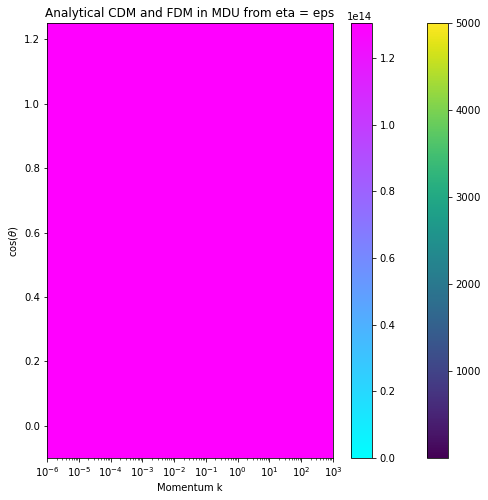

In [7]:
import uncertainties as uc
f21 = [uc.nominal_value(d) for d in data["CDM F2s num"]]
f22 = [uc.nominal_value(d) for d in data["FDM F2s num"]]
plotF2(f21, f22, "Analytical CDM and FDM in MDU from eta = eps")

## The DE block

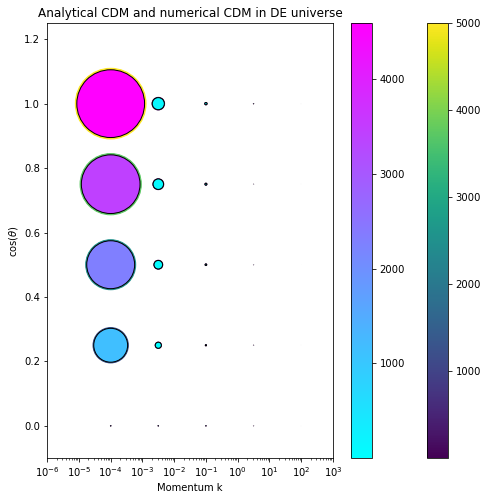

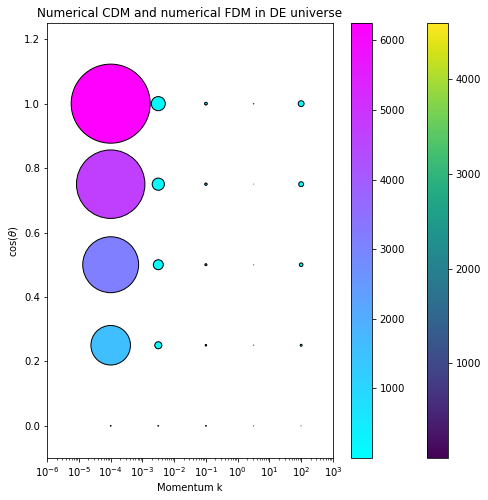

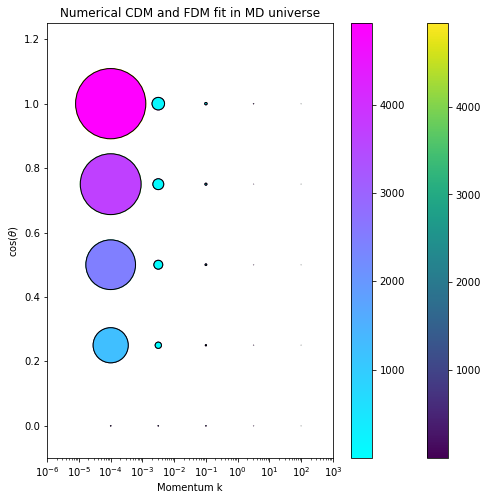

In [7]:
import pandas as pd 

x1 = np.load("f2_cdm_fdm_ana_md.npy", allow_pickle= True)
x2 = np.load("f2_cdm_fdm_num_md.npy", allow_pickle= True)
x3 = np.load("f2_cdm_fdm_num_de.npy", allow_pickle= True)
x4 = np.load("f2_cdm_fdm_fit_md.npy", allow_pickle= True)

diff12   = []
diff13   = []
diff23   = []
diff14   = []
diff1cdm = []
diff2cdm = []
diff3cdm = []
diff4cdm = []
cdm1     = []
cdm2     = []
cdm3     = []
cdm4     = []
fdm1     = []
fdm2     = []
fdm3     = []
fdm4     = []

differences = pd.DataFrame()

for k1 in k1_s:
    for ctheta in ctheta_s:
        tag =  "ctheta="+str(ctheta)+" k1="+str(k1)
        fdm1.append(x1.item()["FDM "+tag].n)
        fdm2.append(x2.item()["FDM "+tag].n)
        fdm3.append(x3.item()["FDM "+tag].n)
        fdm4.append(x4.item()["FDM "+tag].n)
        cdm1.append(x1.item()["CDM "+tag])
        cdm2.append(x2.item()["CDM "+tag].n)
        cdm3.append(x3.item()["CDM "+tag].n)
        cdm4.append(x4.item()["CDM "+tag].n)


        diff = {
            "Rel Diff CDM ana & CDM de": (x1.item()["CDM "+tag]-x3.item()["CDM "+tag])/x3.item()["CDM "+tag],
            "Rel Diff CDM ana & CDM md": (x1.item()["CDM "+tag]-x2.item()["CDM "+tag])/x2.item()["CDM "+tag],
            "Rel Diff CDM ana & FDM ana": (x1.item()["CDM "+tag]-x1.item()["FDM "+tag])/x1.item()["CDM "+tag],
        }

        differences = differences.append(diff, ignore_index=True)

        diff12.append  (fdm1[-1] - fdm2[-1])
        diff23.append  (fdm2[-1] - fdm3[-1])
        diff13.append  (fdm1[-1] - fdm3[-1])
        diff1cdm.append(cdm1[-1] - fdm1[-1])
        diff2cdm.append(cdm2[-1] - fdm2[-1])
        diff3cdm.append(cdm3[-1] - fdm3[-1])
        diff4cdm.append(cdm4[-1] - fdm4[-1])

#plotF2(cdm1, F22=None, title =  "Analytical CDM")
#plotF2(cdm2, F22=None, title =  "Numerical  CDM in MD universe")
#plotF2(cdm3, F22=None, title =  "Numerical  CDM in DE universe")
#plotF2(fdm1, F22=None, title = "Analytical FDM in MD universe")
#plotF2(fdm2, F22=None, title = "Numerical  FDM in MD universe")
#plotF2(fdm3, F22=None, title = "Numerical  FDM in DE universe")

plotF2(cdm1, cdm3, "Analytical CDM and numerical CDM in DE universe")
#plotF2(cdm1, fdm1, "Analytical CDM and analytical FDM in MD universe")
#plotF2(cdm1, fdm2, "Analytical CDM and numerical FDM in MD universe")
#plotF2(cdm1, fdm3, "Analytical CDM and numerical FDM in DE universe")
plotF2(cdm3, fdm3, "Numerical CDM and numerical FDM in DE universe")
plotF2(cdm4, fdm4, "Numerical CDM and FDM fit in MD universe")
#plotF2(diff1cdm, diff12, "Difference between analytical FDM and numerical FDM in MD universe")
#plotF2(diff1cdm, diff12, "Difference between analytical FDM and numerical FDM in MD universe")
#plotF2(diff1cdm, diff12, "Difference between analytical FDM and numerical FDM in MD universe")
#plotF2(diff1cdm, diff13, "Difference between analytical FDM and numerical FDM in DE universe")
#plotF2(diff1cdm, diff23, "Difference between numerical FDM and in MD and DE universes")

In [8]:
differences

Rel Diff CDM ana & CDM de  Rel Diff CDM ana & CDM md  \
0     0.18433902+/-0.00000006    0.00467406+/-0.00000004   
1   0.089005915+/-0.000000012  0.010089768+/-0.000000013   
2   0.088997463+/-0.000000012  0.010090293+/-0.000000013   
3   0.088994019+/-0.000000012  0.010090507+/-0.000000013   
4   0.088991827+/-0.000000012  0.010090643+/-0.000000013   
5     0.18433902+/-0.00000006    0.00467406+/-0.00000004   
6   0.089435668+/-0.000000013  0.010063086+/-0.000000013   
7   0.089170001+/-0.000000012  0.010079578+/-0.000000013   
8   0.089061251+/-0.000000012  0.010086331+/-0.000000013   
9   0.088991827+/-0.000000012  0.010090643+/-0.000000013   
10    0.18433902+/-0.00000006    0.00467406+/-0.00000007   
11  0.101541083+/-0.000000015  0.009320601+/-0.000000014   
12  0.094576945+/-0.000000015  0.009745606+/-0.000000013   
13  0.091303860+/-0.000000013  0.009947354+/-0.000000013   
14  0.088991827+/-0.000000012  0.010090643+/-0.000000013   
15      0.1843390+/-0.0000008    0.00467405+/-0.00000011   
16      0.1802492+/-0.0000008    0.00488734+/-0.00000016   
17      0.2273561+/-0.0000013    0.00252205+/-0.00000020   
18     -0.0185016+/-0.0000010      0.0175535+/-0.0000010   
19    0.08899183+/-0.00000019    0.01009065+/-0.00000007   
20            0.1844+/-0.0008          0.00469+/-0.00029   
21            0.2029+/-0.0008          0.00375+/-0.00033   
22            0.6466+/-0.0035           -0.0123+/-0.0008   
23        0.046022+/-0.000011          0.01287+/-0.00011   
24          0.08900+/-0.00033          0.01010+/-0.00014   

               Rel Diff CDM ana & FDM ana  
0       0.0046546396345+/-0.0000000000010  
1   0.009999141938440+/-0.000000000000011  
2   0.009999658169998+/-0.000000000000011  
3   0.009999869052390+/-0.000000000000011  
4   0.010000003590687+/-0.000000000000011  
5       0.0046546392029+/-0.0000000000010  
6   0.009972977889151+/-0.000000000000011  
7   0.009989194802176+/-0.000000000000011  
8   0.009995852072443+/-0.000000000000011  
9   0.010000112769818+/-0.000000000000011  
10      0.0046542028337+/-0.0000000000010  
11  0.009244232232844+/-0.000000000000031  
12  0.009662686347543+/-0.000000000000021  
13    0.00986154718443+/-0.00000000000009  
14    0.01000287046328+/-0.00000000000017  
15               -0.00062378+/-0.00000005  
16              0.000384915+/-0.000000030  
17             -0.001374801+/-0.000000018  
18              0.014665517+/-0.000000017  
19              0.007601991+/-0.000000013  
20                    99269.8178+/-0.0027  
21                     -3911800.62+/-0.06  
22                     13931438.04+/-0.21  
23                   102206.5671+/-0.0013  
24                     535938.659+/-0.007

### Power spectra

In [17]:
from multiprocessing import pool 
import pandas as pd
import numpy  as np

import constants
import cdm.spectrum
import cdm.p1l 
import uncertainties

import matplotlib.pyplot as plt 

def get_spectrum_dataframe(N_k, N_eta):
  k_array   = np.logspace(-4, 2, N_k, base = 10)
  eta_array = 2*np.sqrt(np.logspace(-1, 0, N_eta))
  spectra = pd.DataFrame(columns = ["eta", "momentum", "tree", "vegas", "error"]) 
  
  return k_array, eta_array, spectra

def compute_p1l(spectrum, eta, N_k, N_eta):
  k_array, eta_array, spectra = get_spectrum_dataframe(N_k, N_eta)

  if N_eta == 1:
    x1 = k_array
    x2 = eta
  else:
    xx, yy = np.meshgrid(k_array, eta_array)
    x1 = xx.flatten()
    x2 = yy.flatten()


  #Prepare input array for starmap
  x = np.zeros((N_k * N_eta, 2))
  x[:, 0] = x1
  x[:, 1] = x2

  with Pool() as pool:
      res = pool.starmap(spectrum, x)
      spectra = spectra.append(res, ignore_index=True)

  return spectra


def plot_power_spectrum(title, sp, i):
    #spectra["nquad"]       = spectra["tree"]           + spectra["nquad"]
    #spectra["nquad_upper"] = spectra["nquad"].n  + spectra["nquad"].s
    #spectra["nquad_lower"] = spectra["nquad"].n  - spectra["nquad"].s

    data    = sp["tree"] + sp["vegas"]
    v_upper = data + sp["error"]
    v_lower = data - sp["error"]
    v_mean  = [v     for v in data]
    plt.figure(figsize=(12,8), dpi=60)
    plt.title(title)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylim(1e-40, 1e5)
    plt.xlabel("k in $Mpc^{-1}$")
    plt.ylabel("$P^{(1)}(k, z)$")

    plt.plot(sp["momentum"], sp["tree"], label="Tree level")

    #plt.plot(spectra["momentum"], spectra["nquad"].n, label="1-loop (nquad)", color="blue")
    #plt.fill_between(spectra["momentum"], 
    #                spectra["nquad_lower"], 
    #                spectra["nquad_upper"],
    #                color='blue', alpha=0.2)

    plt.plot(sp["momentum"], v_mean, label="1-loop (vegas)", color="green")
    plt.fill_between(sp["momentum"], 
                    v_lower, 
                    v_upper,
                    color='green', alpha=0.2)

    plt.legend()
    plt.savefig(f"../figures/{i}.jpg")
    plt.show()


Do not compute initial spectrum using CAMB


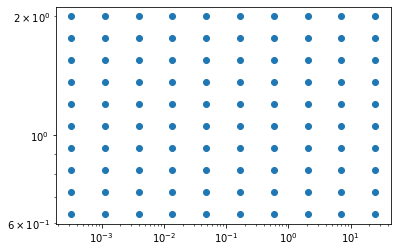

In [14]:
k_array, eta_array, spectra = get_spectrum_dataframe(10, 10)
xx, yy = np.meshgrid(k_array, eta_array)
plt.xscale("log")
plt.yscale("log")
plt.scatter(xx, yy)

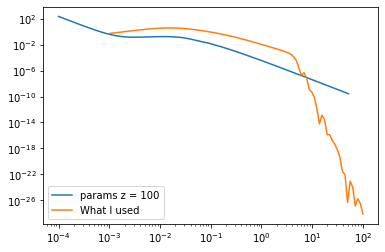

In [31]:
import numpy as np 
import scipy.interpolate as interpolate 
from numba import njit, objmode 
import fdm.growth.analytical as fag
from special_functions import k_norm 
import constants as c 
import matplotlib.pyplot as plt 
import fdm.util as fu 
import fdm.spectrum as fds 
from initial_spectrum import P_0
files = [
        "../../C/IC/axionCAMB/spectra/params_z100_matterpower.dat"
        ]

labels = ["params z = 100"]
#"Original at z = 100", "CDM z = 0", "FDM z = 0", "FDM z = 100", "Chiueh z = 100"
#"../../C/IC/gamer_powerspectrum/planck_2018_axion_matterpower.dat", 
#         "../../C/IC/CAMB/spectra/linear_z0_matterpower.dat",
#         "../../C/IC/axionCAMB/spectra/linear_z0_matterpower.dat",
#         "../../C/IC/axionCAMB/spectra/linear_z100_matterpower.dat",
#         "../../C/IC/axionCAMB/spectra/chiueh_z100_matterpower.dat",
for file, label in zip(files, labels):
  k_vec, P_vec = np.loadtxt(file, unpack=True)
  plt.loglog(k_vec, P_vec, label=label)

#
#kk = np.logspace(-5, 5)
#y  = [fds.P_axionCAMB(k, 2, 8e-23) for k in kk]
kk = np.logspace(-3, 2, 100)
m = 8e-23
y1  = [P_0(k) * fu.FDM_transfer(k, m)**2 for k in kk]
#plt.loglog(kk, y, label="CAMB")
plt.loglog(kk, y1, label="What I used")
plt.legend()

plt.show()

In [19]:
2*np.sqrt(1/(100+1))

0.19900743804199783

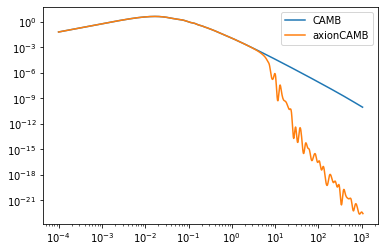

In [14]:
k_vec, P_vec = np.loadtxt("../../C/IC/CAMB/planck_2018_matterpower.dat", unpack=True)

k1_vec, P1_vec = np.loadtxt("../../C/IC/power_spectrum_data_for_Alex/For_Alex/planck_2018_axion_matterpower.dat", unpack=True)
#P0x   = interpolate.interp1d(a_vec,  P_vec, kind='cubic', fill_value="extrapolate")

plt.loglog(k_vec, P_vec, label="CAMB")
plt.loglog(k1_vec, P1_vec, label="axionCAMB")
plt.legend()
plt.show()

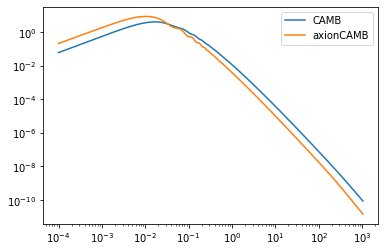

In [14]:
k_vec, P_vec = np.loadtxt("../../C/IC/CAMB/planck_2018_matterpower.dat", unpack=True)

k1_vec, P1_vec = np.loadtxt("../../C/IC/axionCAMB/test_matterpower.dat", unpack=True)
#P0x   = interpolate.interp1d(a_vec,  P_vec, kind='cubic', fill_value="extrapolate")

plt.loglog(k_vec, P_vec, label="CAMB")
plt.loglog(k1_vec, P1_vec, label="axionCAMB")
plt.legend()
plt.show()

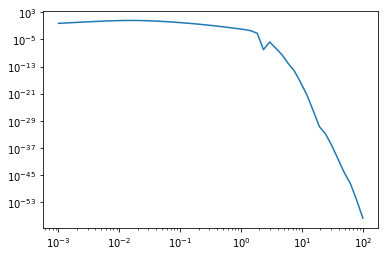

In [19]:
import fdm.spectrum as fs
k_v = np.logspace(-3, 2)
y = [fs.P_FDM_IC(k, 0.2, c.FDM_M) for k in k_v]
plt.loglog(k_v, y)

#### Power spectra

In [12]:
import cdm.p1l 
import fdm.p1l 
import constants
from multiprocessing import Pool 
N_k   = 20
N_eta = 15
eta   = constants.ETA_FIN
m     = constants.FDM_M

def compute_p1l_from_module(args, module, key):
    global compute_spectrum
    def compute_spectrum(k, eta):
        result = {}
        
        #Tree level
        result["eta"]      = eta
        result["momentum"] = k 
        result["tree"]     = module.linear_spectra[key](k, eta, m)

        #Loop level
        #result["nquad"]   = module.nquad_integrators[key](k, *args)
        r = module.vegas_integrators[key](k, eta, m)
        result["vegas"]   = r.n 
        result["error"]   = r.s

        return result

    return compute_p1l(compute_spectrum, args[0], N_k, N_eta)


def compute_all_spectra():
    modules = [cdm.p1l, fdm.p1l]
    spectra = {
    }
    for i, module in enumerate(modules):
        if i == 0:
            args = [eta, 0]
            module_name = "CDM"
        elif i == 1:
            args = [eta, m]
            module_name = "FDM"
        else:
            raise ValueError("Only CDM and FDM available!")

        for key, spectrum in module.linear_spectra.items():
            spectra[module_name + " " + key] = compute_p1l_from_module(args, module, key)
    return spectra

### Create spline for DE universe

In [13]:
args = [2, 1e-23]
data = compute_p1l_from_module(args, fdm.p1l, "FDM IC")

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit

Vegas Integrator Warning: Integration result for args unreliable 0.07880462815669913 1.8824099345361334 1e-23  Mean:  -4.837180367162468  SDEV:  31.039616953367  Q:  0.12255397001094681


In [5]:
data.to_csv("splines/fdm_fdm_23_de.txt")

In [27]:
import pandas
data = pandas.read_csv("splines/fdm_fdm_23_de.txt")

In [28]:
data

Unnamed: 0       eta    momentum          tree         vegas  \
0             0  0.632456    0.000100  6.004813e+00 -1.547557e-08   
1             1  0.632456    0.000207  1.211055e+01 -1.226047e-07   
2             2  0.632456    0.000428  2.441233e+01 -1.189228e-06   
3             3  0.632456    0.000886  4.911008e+01 -9.052868e-06   
4             4  0.632456    0.001833  9.798753e+01 -7.982295e-05   
..          ...       ...         ...           ...           ...   
295         295  2.000000    5.455595  3.380969e-08  3.223002e-04   
296         296  2.000000   11.288379  2.769801e-15  1.263600e-09   
297         297  2.000000   23.357215  2.934864e-20  9.469163e-17   
298         298  2.000000   48.329302  9.094204e-32  1.736404e-26   
299         299  2.000000  100.000000  2.284718e-45  2.378703e-36   

            error  
0    3.109587e-10  
1    2.603621e-09  
2    3.002408e-08  
3    2.117216e-07  
4    1.795077e-06  
..            ...  
295  5.015270e-06  
296  9.223158e-12  
297  6.453966e-18  
298  1.660480e-28  
299  4.940643e-37  

[300 rows x 6 columns]

In [26]:
now = (data["eta"] == 2)
n = data[now]["tree"] + data[now]["vegas"]
np.max(n)

39844.01416544056

In [7]:
etas = data["eta"].unique()
etas

array([0.63245553, 0.686664  , 0.74551874, 0.80941799, 0.87879411,
       0.95411654, 1.03589494, 1.12468265, 1.22108046, 1.32574063,
       1.43937135, 1.56274148, 1.6966858 , 1.84211064, 2.        ])

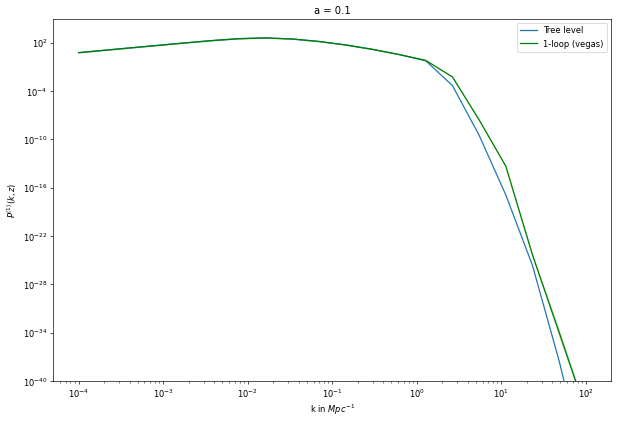

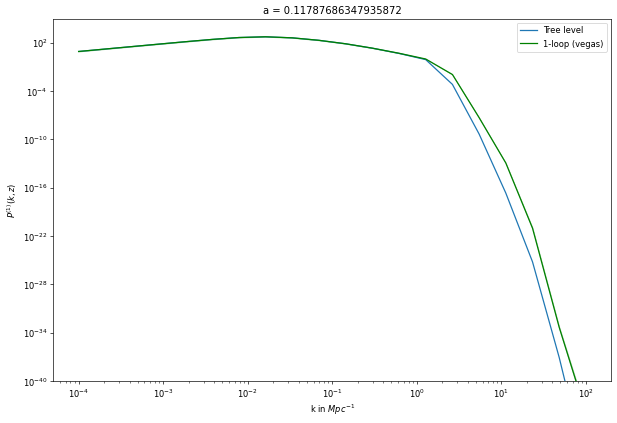

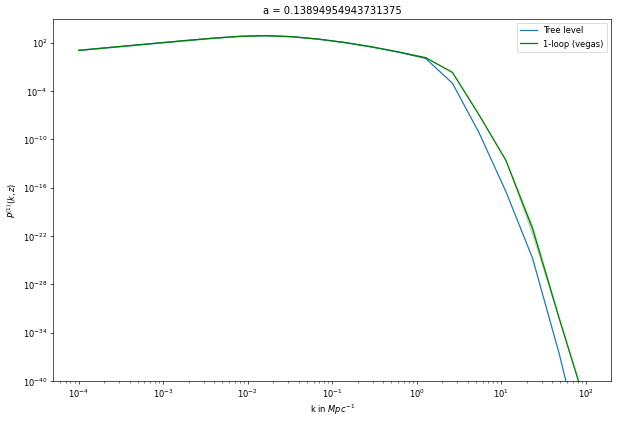

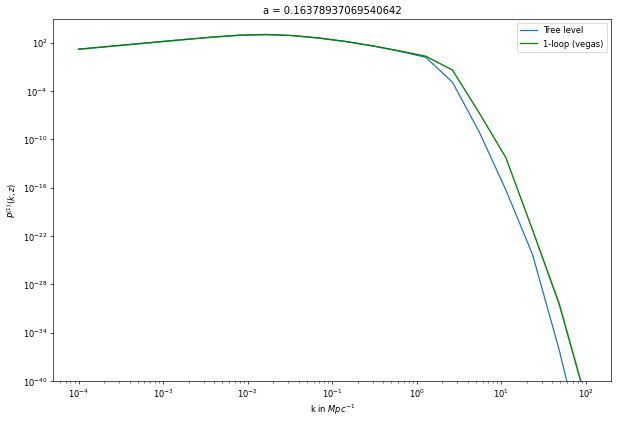

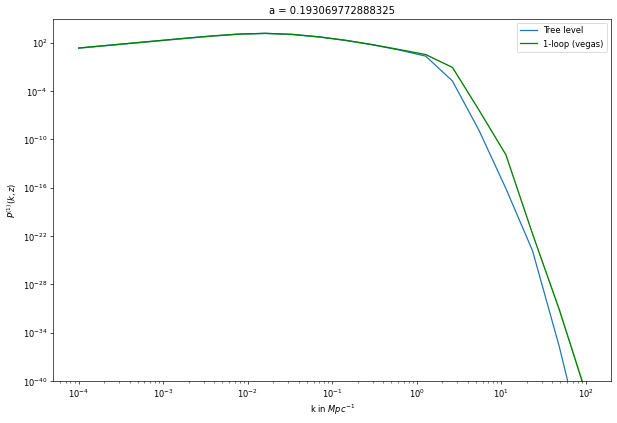

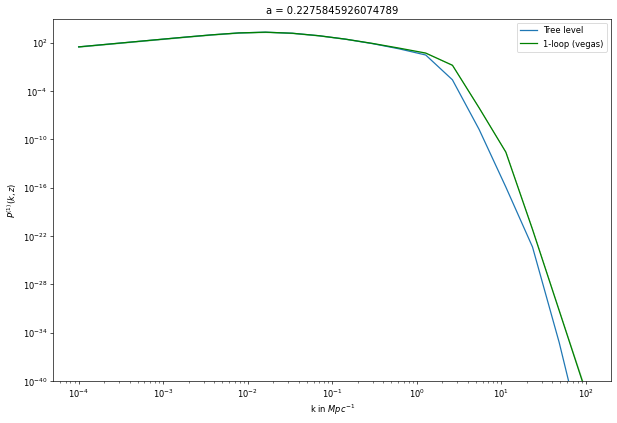

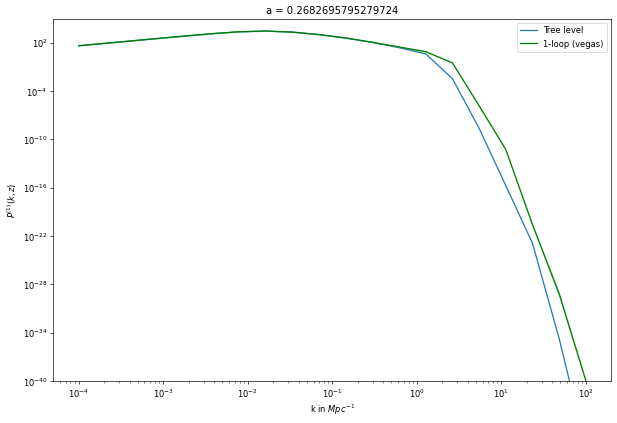

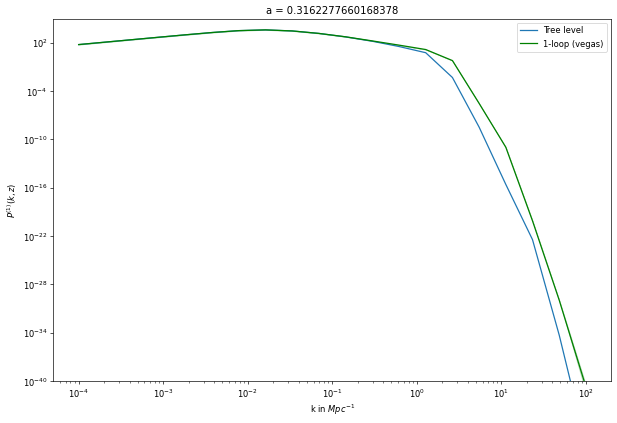

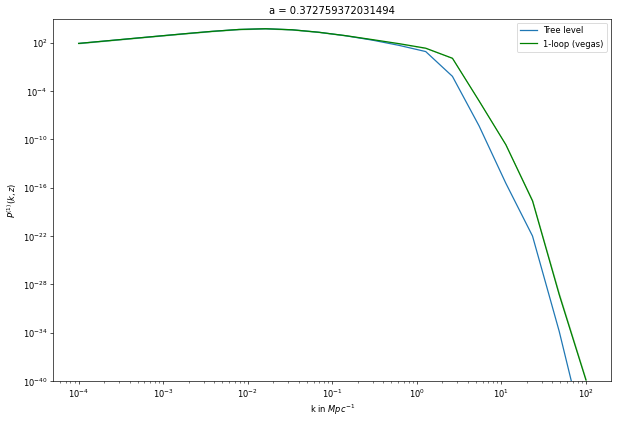

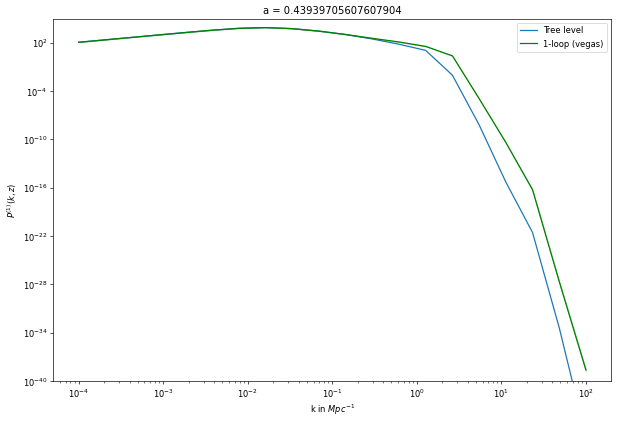

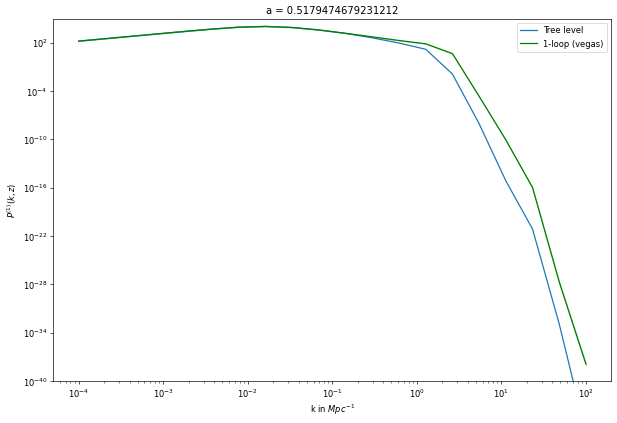

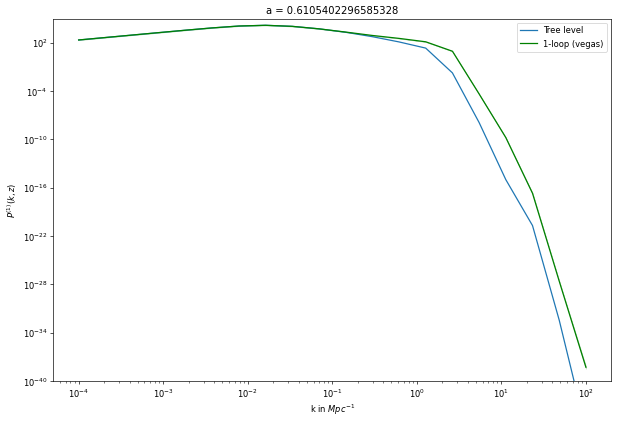

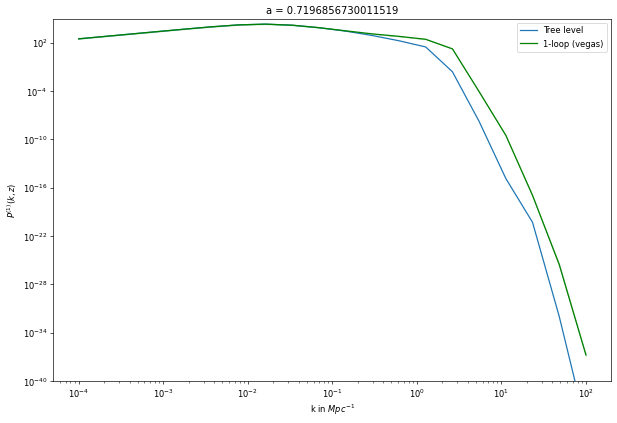

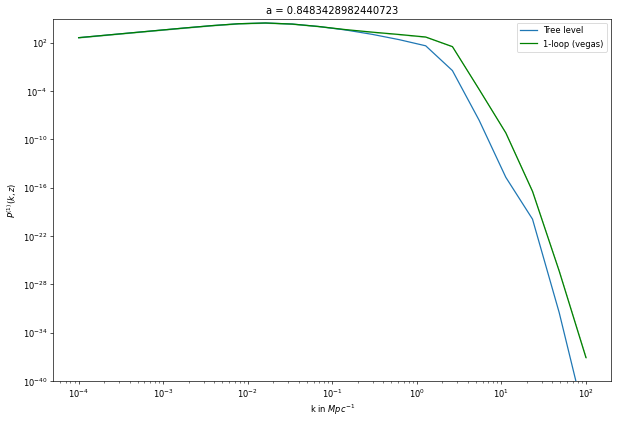

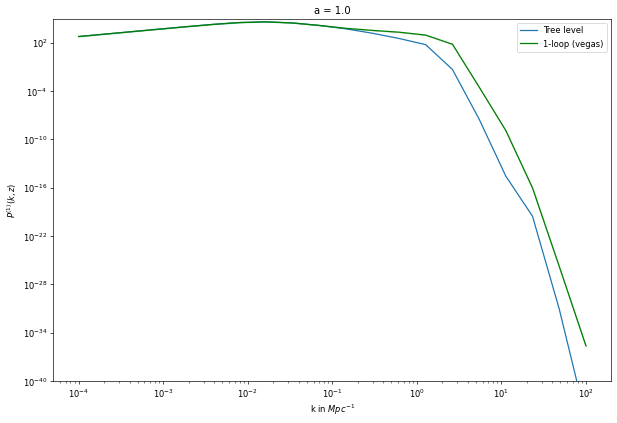

In [20]:
etas = data["eta"].unique()
for i, e in enumerate(etas):
    now = (data["eta"] == e)

    plot_power_spectrum(f"a = {constants.a_from_eta(e)}", data[now], i)

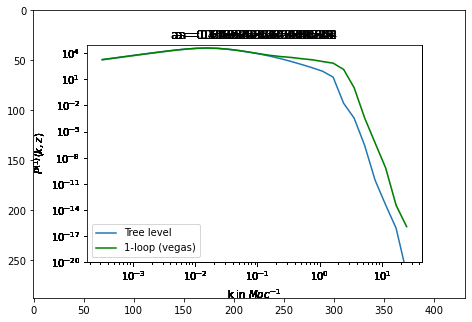

In [39]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

nframes = 15
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)

def animate(i):
    im = plt.imread("../figures/"+str(i)+'.png')
    plt.imshow(im)

anim = FuncAnimation(plt.gcf(), animate, frames=nframes, interval=(2000.0/nframes))
anim.save('../figures/output.gif', writer='pillow')

### Dark-energy universe with analytical couplings and special f

In [110]:
args = [2, 1e-23]
data1 = compute_p1l_from_module(args, fdm.p1l, "FDM IC")

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit

In [111]:
data1

eta    momentum          tree         vegas         error
0   2.0    0.000320  1.844043e+03 -5.870141e-03  1.232937e-04
1   2.0    0.000499  2.828420e+03 -2.186084e-02  4.872309e-04
2   2.0    0.000778  4.334277e+03 -8.075275e-02  1.683987e-03
3   2.0    0.001212  6.627537e+03 -3.111203e-01  6.577865e-03
4   2.0    0.001890  1.008315e+04 -1.127342e+00  2.361350e-02
5   2.0    0.002946  1.516216e+04 -4.097479e+00  8.615340e-02
6   2.0    0.004593  2.220326e+04 -1.353859e+01  2.982300e-01
7   2.0    0.007160  3.071573e+04 -4.553921e+01  1.051215e+00
8   2.0    0.011161  3.810308e+04 -1.274829e+02  3.169095e+00
9   2.0    0.017399  3.986658e+04 -3.085783e+02  8.222480e+00
10  2.0    0.027123  3.417295e+04 -5.256379e+02  1.711631e+01
11  2.0    0.042283  2.460995e+04 -4.942543e+02  2.911162e+01
12  2.0    0.065915  1.556765e+04 -2.334075e+02  4.911475e+01
13  2.0    0.102755  8.880131e+03  3.513319e+02  5.952770e+01
14  2.0    0.160184  4.588484e+03  1.165904e+03  6.788772e+01
15  2.0    0.249712  2.142832e+03  1.812060e+03  6.679336e+01
16  2.0    0.389277  9.090735e+02  2.018484e+03  8.020746e+01
17  2.0    0.606846  3.558577e+02  1.723876e+03  6.193734e+01
18  2.0    0.946014  1.296258e+02  1.195578e+03  4.988881e+01
19  2.0    1.474745  3.393911e+01  7.611750e+02  2.755745e+01
20  2.0    2.298985  5.453716e-03  2.198991e+02  8.802690e-01
21  2.0    3.583897  3.517180e-04  1.092283e+00  1.487588e-02
22  2.0    5.586951  1.162932e-07  8.315146e-05  4.216874e-06
23  2.0    8.709518  3.965350e-11 -5.953049e-08  1.308018e-09
24  2.0   13.577301  5.377256e-15  5.863968e-12  3.634006e-13
25  2.0   21.165706  1.457411e-18 -4.034786e-16  2.020347e-16
26  2.0   32.995300  3.482634e-23 -1.986227e-19  1.293044e-20
27  2.0   51.436498  1.605481e-31  1.556636e-23  3.337015e-24
28  2.0   80.184551  5.760311e-37 -2.770238e-32  1.340828e-33
29  2.0  125.000000  4.173145e-44  2.974612e-39  2.665481e-40

In [112]:
data1.to_csv("../data/fdm_p1l_fdm_ic.txt", sep ='\t')

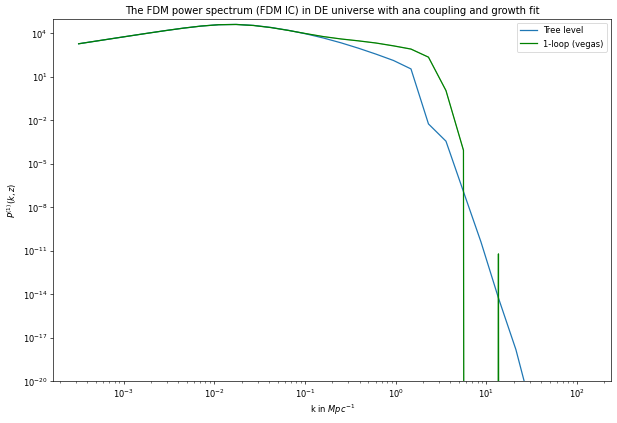

In [113]:
s = data1.copy()
plot_power_spectrum("The FDM power spectrum (FDM IC) in DE universe with ana coupling and growth fit", s)

In [114]:
args = [2, 1e-23]
data2 = compute_p1l_from_module(args, cdm.p1l, "FDM IC")


/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.py:86: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det*mc.P1L_vegas_integrand(P, cdm.coupling.F2s, cdm.coupling.F3s, ctheta, r, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.py:86: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det*mc.P1L_vegas_integrand(P, cdm.coupling.F2s, cdm.coupling.F3s, ctheta, r, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.

In [115]:
data2

eta    momentum          tree         vegas         error
0   2.0    0.000320  1.844043e+03 -6.071932e-03  3.017624e-05
1   2.0    0.000499  2.828420e+03 -2.258490e-02  1.082040e-04
2   2.0    0.000778  4.334277e+03 -8.391796e-02  4.140800e-04
3   2.0    0.001212  6.627537e+03 -3.101108e-01  1.562943e-03
4   2.0    0.001890  1.008315e+04 -1.125949e+00  5.977340e-03
5   2.0    0.002946  1.516216e+04 -4.113939e+00  2.118694e-02
6   2.0    0.004593  2.220326e+04 -1.436508e+01  8.176754e-02
7   2.0    0.007160  3.071573e+04 -4.697986e+01  2.578630e-01
8   2.0    0.011161  3.810308e+04 -1.332292e+02  7.927172e-01
9   2.0    0.017399  3.986658e+04 -3.041924e+02  2.043703e+00
10  2.0    0.027123  3.417295e+04 -5.012877e+02  3.790082e+00
11  2.0    0.042283  2.460995e+04 -5.511108e+02  6.772564e+00
12  2.0    0.065915  1.556765e+04 -2.498751e+02  1.017038e+01
13  2.0    0.102755  8.880131e+03  3.907912e+02  1.440495e+01
14  2.0    0.160184  4.588484e+03  1.201497e+03  1.583150e+01
15  2.0    0.249712  2.142832e+03  1.846763e+03  1.546354e+01
16  2.0    0.389277  9.090735e+02  2.038156e+03  1.314895e+01
17  2.0    0.606846  3.558577e+02  1.745414e+03  8.603662e+00
18  2.0    0.946014  1.296258e+02  1.233444e+03  5.418038e+00
19  2.0    1.474745  3.393911e+01  7.829273e+02  2.366667e+00
20  2.0    2.298985  5.453716e-03  2.245145e+02  7.514928e-01
21  2.0    3.583897  3.517180e-04  1.116303e+00  4.789331e-03
22  2.0    5.586951  1.162932e-07  8.907864e-05  1.214793e-06
23  2.0    8.709518  3.965487e-11 -6.047809e-08  3.671480e-10
24  2.0   13.577301  5.387339e-15  6.542550e-12  1.309649e-13
25  2.0   21.165706  1.609713e-18  6.546852e-17  6.396998e-17
26  2.0   32.995300  4.950868e-22 -3.273295e-18  5.398236e-20
27  2.0   51.436498  3.691334e-27  1.745558e-20  1.206253e-22
28  2.0   80.184551  3.864830e-29 -1.850462e-24  4.649099e-26
29  2.0  125.000000  8.275447e-33  9.170947e-28  2.113347e-29

In [116]:
data2.to_csv("../data/cdm_P1L_fdm_ic.txt")

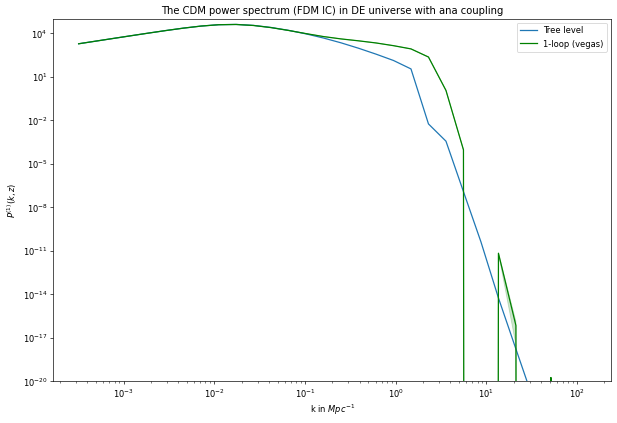

In [117]:
s = data2.copy()
plot_power_spectrum("The CDM power spectrum (FDM IC) in DE universe with ana coupling", s)

In [118]:
args = [2, 1e-23]
data3 = compute_p1l_from_module(args, cdm.p1l, "CDM IC")
data3

/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.py:86: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det*mc.P1L_vegas_integrand(P, cdm.coupling.F2s, cdm.coupling.F3s, ctheta, r, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.py:86: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det*mc.P1L_vegas_integrand(P, cdm.coupling.F2s, cdm.coupling.F3s, ctheta, r, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.

eta    momentum          tree        vegas      error
0   2.0    0.000320   1844.042951    -0.006111   0.000028
1   2.0    0.000499   2828.419613    -0.023071   0.000101
2   2.0    0.000778   4334.277253    -0.084554   0.000400
3   2.0    0.001212   6627.536964    -0.314305   0.001409
4   2.0    0.001890  10083.151722    -1.154905   0.005657
5   2.0    0.002946  15162.163329    -4.221632   0.019109
6   2.0    0.004593  22203.263308   -14.590804   0.073707
7   2.0    0.007160  30715.729178   -48.196247   0.239540
8   2.0    0.011161  38103.082771  -136.987542   0.733222
9   2.0    0.017399  39866.582123  -308.003592   1.889945
10  2.0    0.027123  34172.950544  -512.810131   3.699654
11  2.0    0.042283  24609.952459  -568.419969   6.256792
12  2.0    0.065915  15567.651720  -282.822867   9.682709
13  2.0    0.102755   8880.130716   350.537636  13.721981
14  2.0    0.160184   4588.485600  1148.370394  15.556760
15  2.0    0.249712   2142.840292  1759.407627  15.247829
16  2.0    0.389277    909.125216  1938.635360  13.410150
17  2.0    0.606846    356.177569  1680.222100   8.910974
18  2.0    0.946014    131.683886  1201.333921   5.724323
19  2.0    1.474745     46.862945   722.321479   2.965294
20  2.0    2.298985     16.289880   396.549766   1.133634
21  2.0    3.583897      5.584038   202.126464   0.575884
22  2.0    5.586951      1.898664    98.974485   0.412155
23  2.0    8.709518      0.642543    46.010999   0.152703
24  2.0   13.577301      0.216855    21.294742   0.090554
25  2.0   21.165706      0.073071     9.417522   0.029717
26  2.0   32.995300      0.024599     4.198175   0.017176
27  2.0   51.436498      0.008276     1.856168   0.005491
28  2.0   80.184551      0.002784     0.811500   0.003190
29  2.0  125.000000      0.000936     0.352134   0.001036

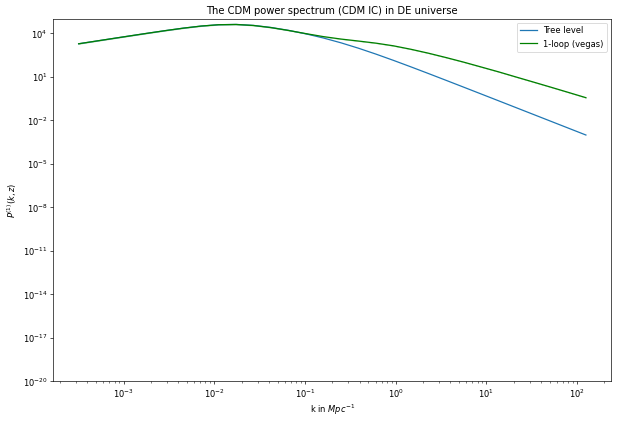

In [119]:
s = data3.copy()
plot_power_spectrum("The CDM power spectrum (CDM IC) in DE universe", s)

In [120]:
data1 - data2

eta  momentum          tree         vegas         error
0   0.0       0.0  0.000000e+00  2.017916e-04  9.311749e-05
1   0.0       0.0  0.000000e+00  7.240671e-04  3.790269e-04
2   0.0       0.0  0.000000e+00  3.165206e-03  1.269907e-03
3   0.0       0.0  0.000000e+00 -1.009515e-03  5.014922e-03
4   0.0       0.0  0.000000e+00 -1.392750e-03  1.763616e-02
5   0.0       0.0  0.000000e+00  1.646019e-02  6.496646e-02
6   0.0       0.0  0.000000e+00  8.264926e-01  2.164625e-01
7   0.0       0.0  0.000000e+00  1.440658e+00  7.933519e-01
8   0.0       0.0  0.000000e+00  5.746364e+00  2.376378e+00
9   0.0       0.0  0.000000e+00 -4.385836e+00  6.178777e+00
10  0.0       0.0  0.000000e+00 -2.435020e+01  1.332623e+01
11  0.0       0.0  0.000000e+00  5.685643e+01  2.233906e+01
12  0.0       0.0  0.000000e+00  1.646763e+01  3.894437e+01
13  0.0       0.0  0.000000e+00 -3.945933e+01  4.512275e+01
14  0.0       0.0  0.000000e+00 -3.559332e+01  5.205623e+01
15  0.0       0.0  0.000000e+00 -3.470296e+01  5.132981e+01
16  0.0       0.0  0.000000e+00 -1.967168e+01  6.705851e+01
17  0.0       0.0 -5.115908e-13 -2.153802e+01  5.333368e+01
18  0.0       0.0 -9.379164e-12 -3.786610e+01  4.447077e+01
19  0.0       0.0 -1.338591e-10 -2.175225e+01  2.519079e+01
20  0.0       0.0 -1.169556e-12 -4.615377e+00  1.287762e-01
21  0.0       0.0 -4.101070e-12 -2.402009e-02  1.008655e-02
22  0.0       0.0 -7.372769e-14 -5.927180e-06  3.002081e-06
23  0.0       0.0 -1.366896e-15  9.475931e-10  9.408704e-10
24  0.0       0.0 -1.008296e-17 -6.785824e-13  2.324357e-13
25  0.0       0.0 -1.523019e-19 -4.689471e-16  1.380647e-16
26  0.0       0.0 -4.602605e-22  3.074672e-18 -4.105191e-20
27  0.0       0.0 -3.691173e-27 -1.744002e-20 -1.172883e-22
28  0.0       0.0 -3.864830e-29  1.850462e-24 -4.649099e-26
29  0.0       0.0 -8.275447e-33 -9.170947e-28 -2.113347e-29

In [121]:

def plot_power_spectrum(title, runs, labels):

    plt.figure(figsize=(12,8), dpi=60)
    plt.title(title)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1, 10)
    plt.ylim(1e-20, 1e5)
    plt.xlabel("k in $Mpc^{-1}$")
    plt.ylabel("$P^{(1)}(k, z)$")
    
    for run, label in zip(runs, labels):
        data    = run["tree"] + run["vegas"]
        v_upper = data + run["error"]
        v_lower = data - run["error"]
        v_mean  = [v     for v in data]

        plt.plot(run["momentum"], run["tree"], label=label + " tree")

        #plt.plot(spectra["momentum"], spectra["nquad"].n, label="1-loop (nquad)", color="blue")
        #plt.fill_between(spectra["momentum"], 
        #                spectra["nquad_lower"], 
        #                spectra["nquad_upper"],
        #                color='blue', alpha=0.2)

        plt.plot(run["momentum"], v_mean, label=label + " 1-loop")
        #plt.fill_between(run["momentum"], 
        #                v_lower, 
        #                v_upper,
        #                color='green', alpha=0.2)

    plt.legend()
    plt.show()


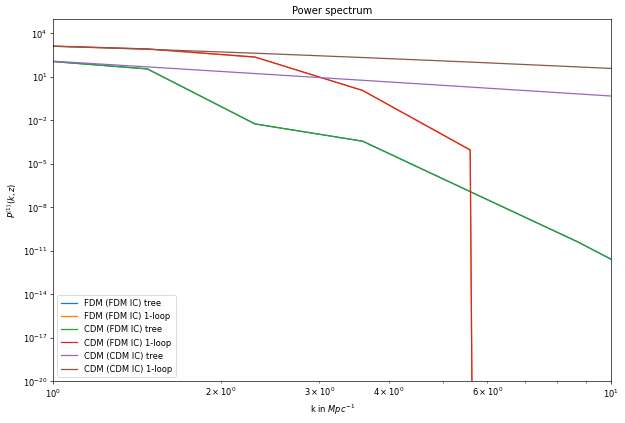

In [122]:
plot_power_spectrum("Power spectrum", [data1, data2, data3], ["FDM (FDM IC)", "CDM (FDM IC)", "CDM (CDM IC)"])

### FDM with analytical couplings

In [5]:
args = [2, 1e-23]
data = compute_p1l_from_module(args, fdm.p1l, "FDM IC")
data

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit

Vegas Integrator Warning: Integration result for args unreliable 0.08111308307896872 2 1e-23  Mean:  55.95713543374362  SDEV:  47.05485562001001  Q:  0.9092352062526272


momentum          tree  nquad                 vegas
0     0.000100  6.004813e+02    NaN  -0.000185+/-0.000004
1     0.000115  6.870321e+02    NaN  -0.000279+/-0.000006
2     0.000132  7.860538e+02    NaN  -0.000429+/-0.000009
3     0.000152  8.993414e+02    NaN  -0.000657+/-0.000014
4     0.000175  1.028947e+03    NaN  -0.000986+/-0.000022
..         ...           ...    ...                   ...
95   57.223677  4.441051e-39    NaN   (1.277+/-0.019)e-33
96   65.793322  5.501571e-39    NaN    (-6.62+/-0.09)e-34
97   75.646333  1.304852e-41    NaN      (-9.8+/-0.5)e-37
98   86.974900  3.558537e-45    NaN     (8.90+/-0.10)e-38
99  100.000000  1.508971e-47    NaN     (3.85+/-0.04)e-39

[100 rows x 4 columns]

In [10]:
data.to_html("fdm_p1l_ana_ana_md.html", col_space='90px')
data.to_csv("fdm_p1l_ana_ana_md.txt")


In [16]:
data2 = pd.read_csv("fdm_p1l_ana_ana_md.txt")

0     -0.000185+/-0.000004
1     -0.000279+/-0.000006
2     -0.000429+/-0.000009
3     -0.000657+/-0.000014
4     -0.000986+/-0.000022
              ...         
95     (1.277+/-0.019)e-33
96      (-6.62+/-0.09)e-34
97        (-9.8+/-0.5)e-37
98       (8.90+/-0.10)e-38
99       (3.85+/-0.04)e-39
Name: vegas, Length: 100, dtype: object

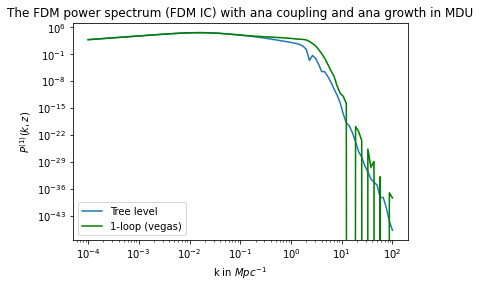

In [11]:
s = data.copy()
plot_power_spectrum("The FDM power spectrum (FDM IC) with ana coupling and ana growth in MDU", s)

In [3]:
args = [2, 1e-23]
data = compute_p1l_from_module(args, fdm.p1l, "FDM IC")
data

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit

momentum          tree  nquad                 vegas
0     0.000100  6.004813e+02    NaN  -0.000189+/-0.000004
1     0.000115  6.870321e+02    NaN  -0.000288+/-0.000006
2     0.000132  7.860538e+02    NaN  -0.000412+/-0.000009
3     0.000152  8.993414e+02    NaN  -0.000636+/-0.000014
4     0.000175  1.028947e+03    NaN  -0.000980+/-0.000021
..         ...           ...    ...                   ...
95   57.223677  6.037015e-32    NaN     (8.65+/-0.12)e-27
96   65.793322  1.329454e-33    NaN  (-1.592+/-0.022)e-28
97   75.646333  8.050355e-36    NaN  (-1.231+/-0.017)e-30
98   86.974900  6.917028e-40    NaN   (1.010+/-0.011)e-32
99  100.000000  5.149600e-43    NaN     (8.45+/-0.07)e-35

[100 rows x 4 columns]

In [4]:
data.to_html("fdm_p1l_fit_ana_md.html", col_space='90px')
data.to_csv("fdm_p1l_fit_ana_md.txt")

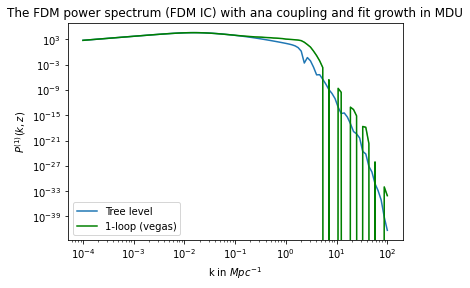

In [6]:
s = data.copy()
plot_power_spectrum("The FDM power spectrum (FDM IC) with ana coupling and fit growth in MDU", s)

In [11]:
d1

momentum          tree  nquad                 vegas
0     0.000100  6.004813e+02    NaN  -0.000189+/-0.000004
1     0.000115  6.870321e+02    NaN  -0.000288+/-0.000006
2     0.000132  7.860538e+02    NaN  -0.000412+/-0.000009
3     0.000152  8.993414e+02    NaN  -0.000636+/-0.000014
4     0.000175  1.028947e+03    NaN  -0.000980+/-0.000021
..         ...           ...    ...                   ...
95   57.223677  6.037015e-32    NaN     (8.65+/-0.12)e-27
96   65.793322  1.329454e-33    NaN  (-1.592+/-0.022)e-28
97   75.646333  8.050355e-36    NaN  (-1.231+/-0.017)e-30
98   86.974900  6.917028e-40    NaN   (1.010+/-0.011)e-32
99  100.000000  5.149600e-43    NaN     (8.45+/-0.07)e-35

[100 rows x 4 columns]

In [12]:
d2

Unnamed: 0    momentum          tree  nquad                 vegas
0            0    0.000100  6.004813e+02    NaN  -0.000185+/-0.000004
1            1    0.000115  6.870321e+02    NaN  -0.000279+/-0.000006
2            2    0.000132  7.860538e+02    NaN  -0.000429+/-0.000009
3            3    0.000152  8.993414e+02    NaN  -0.000657+/-0.000014
4            4    0.000175  1.028947e+03    NaN  -0.000986+/-0.000022
..         ...         ...           ...    ...                   ...
95          95   57.223677  4.441051e-39    NaN   (1.277+/-0.019)e-33
96          96   65.793322  5.501571e-39    NaN    (-6.62+/-0.09)e-34
97          97   75.646333  1.304852e-41    NaN      (-9.8+/-0.5)e-37
98          98   86.974900  3.558537e-45    NaN     (8.90+/-0.10)e-38
99          99  100.000000  1.508971e-47    NaN     (3.85+/-0.04)e-39

[100 rows x 5 columns]

In [9]:
d2["vegas"][0]

'-0.000185+/-0.000004'

### FDM with fit

In [9]:
args = [2, 1e-23]
data = compute_p1l_from_module(args, fdm.p1l, "FDM IC")
data

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:129: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home

momentum          tree nquad vegas             vegas_1l
0    0.000100  6.004813e+02   NaN   NaN            0.1+/-3.4
1    0.000464  2.638784e+03   NaN   NaN              22+/-14
2    0.002154  1.139222e+04   NaN   NaN         (-1+/-6)e+01
3    0.010000  3.662101e+04   NaN   NaN     (-1.3+/-1.9)e+02
4    0.046416  2.256583e+04   NaN   NaN     (-5.3+/-2.0)e+02
5    0.215443  2.791088e+03   NaN   NaN    (1.80+/-0.13)e+03
6    1.000000  1.133200e+02   NaN   NaN    (1.24+/-0.07)e+03
7    4.641589  4.269854e-06   NaN   NaN    0.00876+/-0.00019
8   21.544347  1.413119e-19   NaN   NaN  (2.316+/-0.020)e-14
9  100.000000  5.149600e-43   NaN   NaN  (2.694+/-0.032)e-34

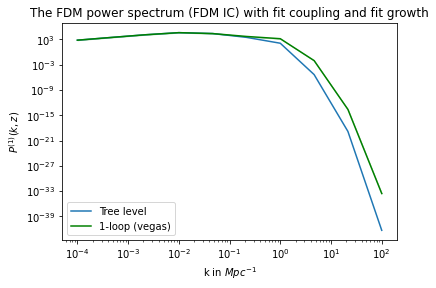

In [10]:
s = data.copy()
plot_power_spectrum("The FDM power spectrum (FDM IC) with fit coupling and fit growth", s)

In [5]:
args = [2, 1e-23]
data = compute_p1l_from_module(args, fdm.p1l, "FDM IC")
data

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:130: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:130: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit

momentum          tree nquad vegas              vegas_1l
0    0.000100  6.004813e+02   NaN   NaN  -0.000188+/-0.000004
1    0.000464  2.638784e+03   NaN   NaN      -0.0184+/-0.0004
2    0.002154  1.139222e+04   NaN   NaN        -1.675+/-0.034
3    0.010000  3.662101e+04   NaN   NaN          -112.0+/-2.3
4    0.046416  2.256583e+04   NaN   NaN             -562+/-33
5    0.215443  2.791088e+03   NaN   NaN     (1.73+/-0.09)e+03
6    1.000000  1.133200e+02   NaN   NaN     (1.05+/-0.06)e+03
7    4.641589  4.253756e-06   NaN   NaN     0.00683+/-0.00021
8   21.544347  4.436185e-26   NaN   NaN     (7.62+/-0.06)e-21
9  100.000000  5.147567e-52   NaN   NaN       (4.5+/-1.0)e-43

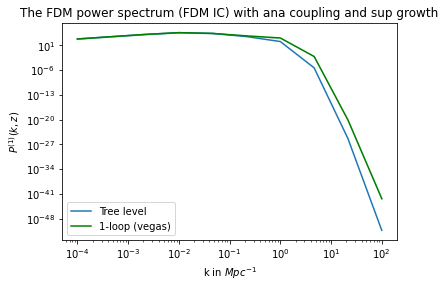

In [6]:
s = data.copy()
plot_power_spectrum("The FDM power spectrum (FDM IC) with ana coupling and sup growth", s)

In [3]:
args = [2, 1e-23]
data = compute_p1l_from_module(args, fdm.p1l, "FDM IC")
data

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:130: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/p1l.py:130: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det * mc.P1L_vegas_integrand(P, fdm.coupling.F2si, fdm.coupling.F3si, ctheta, k1, s, s2, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit

momentum          tree nquad vegas             vegas_1l
0    0.000100  6.004813e+02   NaN   NaN    0.00241+/-0.00005
1    0.000464  2.638784e+03   NaN   NaN     -0.0079+/-0.0009
2    0.002154  1.139222e+04   NaN   NaN       -1.648+/-0.035
3    0.010000  3.662101e+04   NaN   NaN         -103.9+/-2.4
4    0.046416  2.256583e+04   NaN   NaN     (-5.0+/-0.4)e+02
5    0.215443  2.791088e+03   NaN   NaN    (1.67+/-0.08)e+03
6    1.000000  1.133200e+02   NaN   NaN      (9.4+/-0.7)e+02
7    4.641589  4.253756e-06   NaN   NaN      0.0196+/-0.0006
8   21.544347  4.436185e-26   NaN   NaN  (4.141+/-0.033)e-20
9  100.000000  5.147567e-52   NaN   NaN  (2.460+/-0.026)e-42

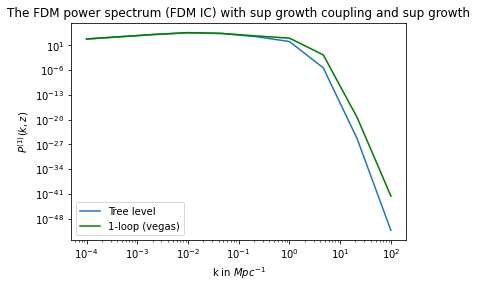

In [4]:
s = data.copy()
plot_power_spectrum("The FDM power spectrum (FDM IC) with sup growth coupling and sup growth", s)

In [5]:
args = [2, 1e-23]
data = compute_p1l_from_module(args, fdm.p1l, "FDM IC")
data

NameError: name 'compute_p1l_from_module' is not defined

In [ ]:
s = data.copy()
plot_power_spectrum("The FDM power spectrum (FDM IC) with num coupling and ren growth", s)

In [33]:
spectra = compute_all_spectra()
for v, k in spectra.items():
    print(v)

/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.py:86: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det*mc.P1L_vegas_integrand(P, cdm.coupling.F2s, cdm.coupling.F3s, ctheta, r, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.py:86: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  return det*mc.P1L_vegas_integrand(P, cdm.coupling.F2s, cdm.coupling.F3s, ctheta, r, *args)
/home/xerox/anaconda3/lib/python3.8/site-packages/numba/core/utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/xerox/Documents/Masterarbeit/PT_Python/sample/cdm/p1l.

CDM CDM IC
CDM Scale-free
FDM CDM IC
FDM FDM IC
FDM Scale-free
FDM CDM


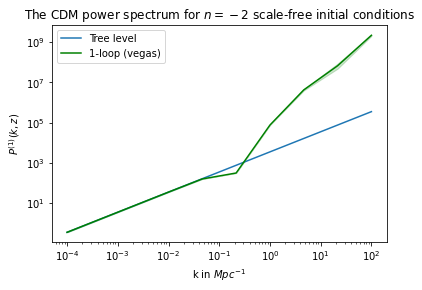

In [34]:
s = spectra["CDM Scale-free"].copy()
s["tree"]     = s["tree"]     * 4*np.pi*s["momentum"]**3
s["vegas_1l"] = s["vegas_1l"] * 4*np.pi*s["momentum"]**3
plot_power_spectrum("The CDM power spectrum for $n=-2$ scale-free initial conditions", s)

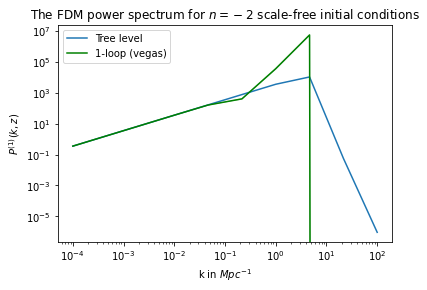

In [36]:
s = spectra["FDM Scale-free"].copy()
s["tree"]     = s["tree"]     * 4*np.pi*s["momentum"]**3
s["vegas_1l"] = s["vegas_1l"] * 4*np.pi*s["momentum"]**3
plot_power_spectrum("The FDM power spectrum for $n=-2$ scale-free initial conditions", s)

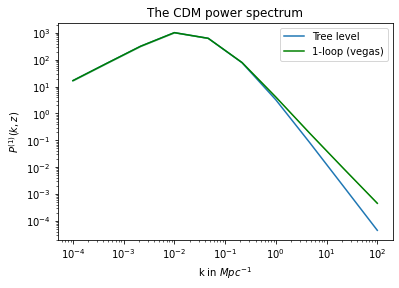

In [38]:
s = spectra["CDM CDM IC"].copy()
plot_power_spectrum("The CDM power spectrum", s)

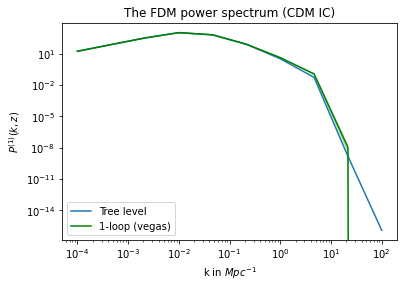

In [39]:
s = spectra["FDM CDM IC"].copy()
plot_power_spectrum("The FDM power spectrum (CDM IC)", s)

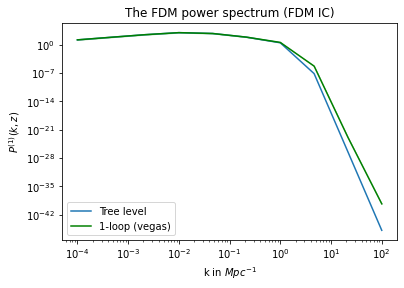

In [40]:
s = spectra["FDM FDM IC"].copy()
plot_power_spectrum("The FDM power spectrum (FDM IC)", s)

### Tree-level bispectra

In [50]:
import matplotlib.pyplot as plt
import numpy as np 
import constants
import uncertainties
import pandas as pd 


def plot_reduced_scale_free_bispectra(title, F2, args, N):
  reduced_bispectra = {
  }

  def P(k, *args):
    eta = args[0]
    return np.linalg.norm(k)**n

  def P1L(k, *args):
    return 0 

  b_utils    = bispectrum.make_tree_bispectrum_utilities(P, F2, P1L)
  x = np.linspace(0, 1, N)

  n_array = [0, -0.5, -1, -1.5, -2]
  r1 = 20.0
  r2 = 1.0

  for n in n_array:  
    y = np.zeros(x.shape)

    for i, theta in enumerate(x):
      k1, k2, k3 = bispectrum.generate_triangle(theta * np.pi, r2, r1)

      y[i] = uncertainties.nominal_value(b_utils["red. bispectrum tree"](k1, k2, k3, *args))

    plt.plot(x, y, label = "n={}".format(n))
    reduced_bispectra[str(n)] = y

  plt.title("Angular dependency of " + title + f" for k1/k2 = {r1/r2}")
  plt.xlabel("$\Theta/\pi$")
  plt.ylabel("$Q(\Theta)$")
  plt.legend()
  plt.show()

  return reduced_bispectra


def reduced_bispectrum(title, P, F2, args, N):
  def P1L(k, *args):
    return 0 

  b_utils    = bispectrum.make_tree_bispectrum_utilities(P, F2, P1L)
  x = np.linspace(0, 1, N)

  data = pd.DataFrame()
  
  data["theta"] = x * np.pi 

  r_combinations = [[1, 1], [1, 20], [20, 20]]

  y = np.zeros(x.shape)

  for rs in r_combinations:
    r1, r2 = rs
    for i, theta in enumerate(x):
      k1, k2, k3 = bispectrum.generate_triangle(theta * np.pi, r2, r1)
      y[i] = uncertainties.nominal_value(b_utils["red. bispectrum tree"](k1, k2, k3, *args))

    data[f"r1_{r1}_r2_{r2}"] = y 

    plt.plot(x, y)
    plt.title("Angular dependency of " + title + f" for k1/k2 = {r1/r2}")
    plt.xlabel("$\Theta/\pi$")
    plt.ylabel("$Q(\Theta)$")
    plt.legend()
    plt.show()

  x = np.logspace(-4, 2, N)
  data["r"] = x

  for i, r in enumerate(x):
    k1, k2, k3 = np.array(bispectrum.generate_triangle())*r
    
    y[i] = uncertainties.nominal_value(b_utils["red. bispectrum tree"](k1, k2, k3, *args))

  data[f"equilateral"] = y 

  plt.plot(x, y)
  plt.title("Reduced bispectrum for equilateral configurations")
  plt.xlabel(r"r in $Mpc^(-1)$")
  plt.ylabel("$Q(\Theta)$")
  plt.legend()
  plt.show()

  return data

CDM

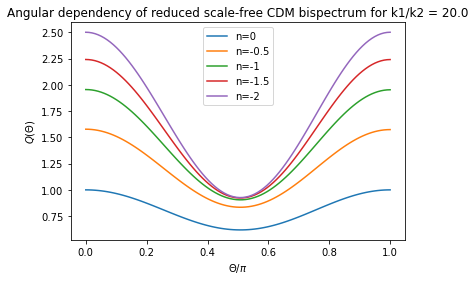

{'0': array([1.        , 0.99963389, 0.99853695, 0.99671331, 0.99416983,
        0.99091611, 0.9869644 , 0.9823296 , 0.97702919, 0.97108319,
        0.96451405, 0.9573466 , 0.94960794, 0.94132738, 0.9325363 ,
        0.92326805, 0.91355782, 0.90344255, 0.89296076, 0.88215241,
        0.87105879, 0.85972234, 0.84818649, 0.83649555, 0.82469448,
        0.81282879, 0.8009443 , 0.78908705, 0.77730307, 0.76563823,
        0.75413807, 0.7428476 , 0.73181117, 0.72107228, 0.71067339,
        0.70065579, 0.69105943, 0.68192273, 0.67328248, 0.66517364,
        0.65762921, 0.65068013, 0.64435509, 0.63868045, 0.63368011,
        0.62937539, 0.62578498, 0.62292478, 0.62080786, 0.61944442,
        0.61884166, 0.61900379, 0.61993199, 0.62162434, 0.62407586,
        0.62727849, 0.63122108, 0.63588947, 0.64126644, 0.64733187,
        0.65406269, 0.66143303, 0.6694143 , 0.67797525, 0.68708212,
        0.69669873, 0.70678665, 0.71730534, 0.72821226, 0.73946312,
        0.75101198, 0.76281146, 0.77481297,

In [52]:
import bispectrum
import cdm.coupling 
plot_reduced_scale_free_bispectra("reduced scale-free CDM bispectrum", cdm.coupling.F2s, [constants.ETA_FIN], 100)

In [ ]:
import cdm.coupling as cdc
import fdm.coupling as fdc
import cdm.spectrum as cds
import fdm.spectrum as fds

d1 = reduced_bispectrum("Reduced CDM (CDM IC) bispectrum", cds.P_CDM_IC, cdc.F2s, [constants.ETA_FIN], 100)
d2 = reduced_bispectrum("Reduced CDM (FDM IC) bispectrum", cds.P_FDM_IC, cdc.F2s, [constants.ETA_FIN], 100)
d3 = reduced_bispectrum("Reduced FDM (CDM IC) bispectrum", fds.P_CDM_IC, fdc.F2s, [constants.ETA_FIN, constants.FDM_M], 10)
d4 = reduced_bispectrum("Reduced FDM (FDM IC) bispectrum", fds.P_FDM_IC, fdc.F2s, [constants.ETA_FIN, constants.FDM_M], 10)

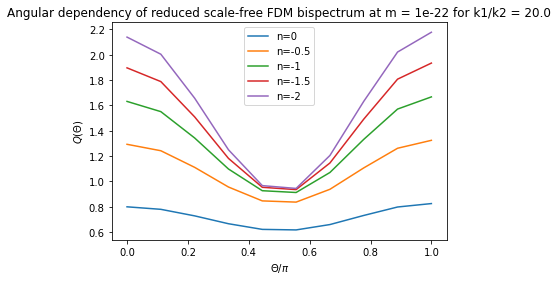

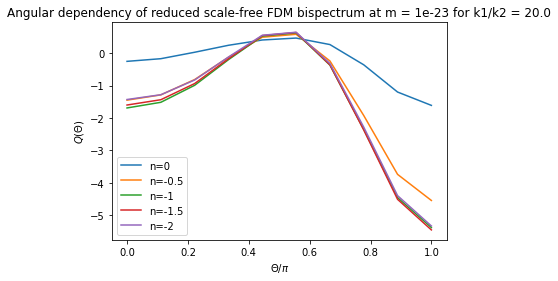

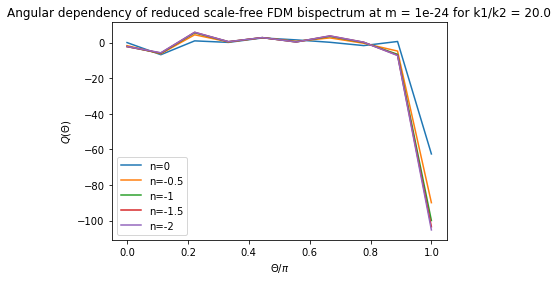

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:176: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=100)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:176: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=100)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:176: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit y

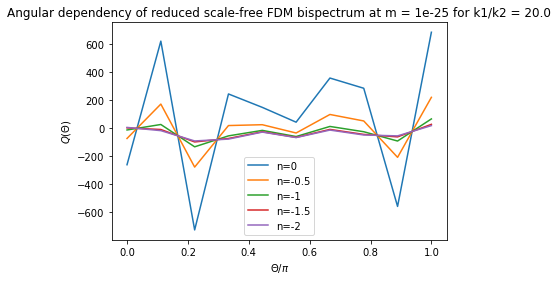

In [54]:
import fdm.coupling 
import numpy as np
import bispectrum

masses = [1e-22, 1e-23, 1e-24, 1e-25]
for m in masses:
    plot_reduced_bispectrum(f"reduced scale-free FDM bispectrum at m = {m}", fdm.coupling.F2s, (constants.ETA_FIN, m), 10)


### FDM Ana-Ana

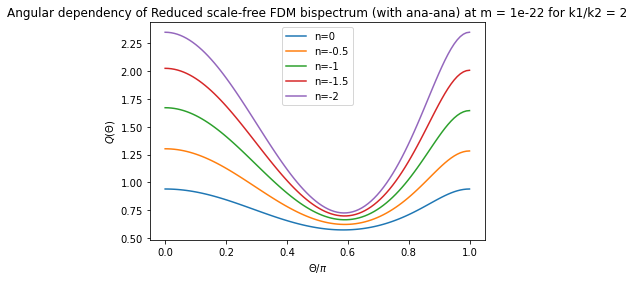

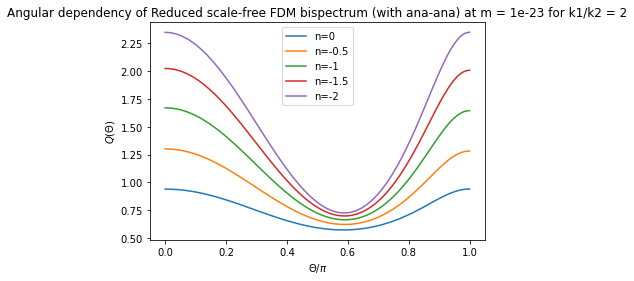

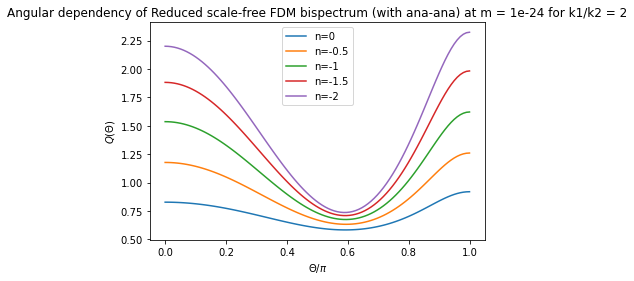

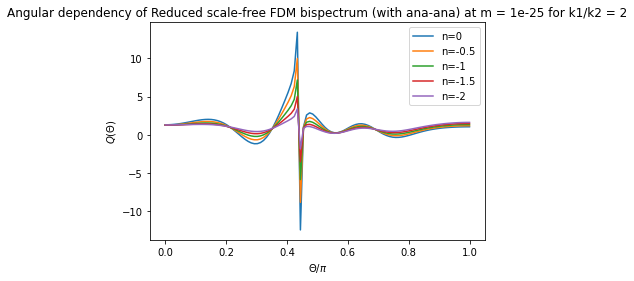

In [7]:
import fdm.coupling 
import numpy as np
import bispectrum

masses = [1e-22, 1e-23, 1e-24, 1e-25]
bispectra = {}
for m in masses:
    bispectra[str(m)] = plot_reduced_bispectrum(f"Reduced scale-free FDM bispectrum (with ana-ana) at m = {m}", fdm.coupling.F2s, (constants.ETA_FIN, m))


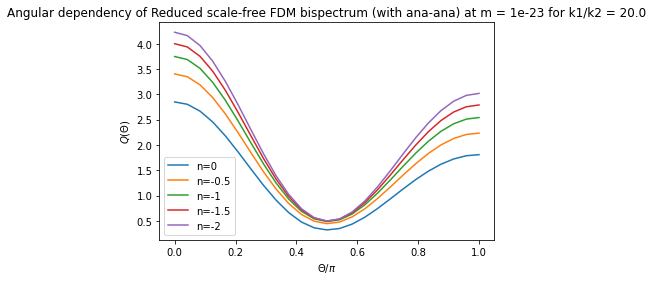

In [5]:
import fdm.coupling 
import numpy as np
import bispectrum

masses = [1e-23]
bispectra = {}
for m in masses:
    bispectra[str(m)] = plot_reduced_bispectrum(f"Reduced scale-free FDM bispectrum (with ana-ana) at m = {m}", fdm.coupling.F2s, (constants.ETA_FIN, m), N = 25)


In [3]:
np.save("ana_ana_red_bi.npy", bispectra)

In [5]:
x1 = np.load("ana_ana_red_bi.npy", allow_pickle=True)
x2 = np.load("ana_num_red_bi.npy", allow_pickle=True)
x3 = np.load("ana_sup_red_bi.npy", allow_pickle=True)
x4 = np.load("sup_sup_red_bi.npy", allow_pickle=True)

In [6]:
m21 = x1.item().get("1e-23").get("-1")
m22 = x2.item().get("1e-23").get("-1")
m23 = x3.item().get("1e-23").get("-1")
m24 = x4.item().get("1e-23").get("-1")

(m21 - m22)/m21, (m21 - m23)/m21, (m21 - m24)/m21

(array([0.00021204, 0.00022155, 0.00024522, 0.00058832, 0.00021805,
        0.00021971, 0.00022611, 0.00022622, 0.0002323 , 0.00025639,
        0.00022689, 0.00025519, 0.00025044, 0.00024192, 0.00024544,
        0.00023386, 0.0002272 , 0.00021668, 0.000204  , 0.00020351,
        0.00018956, 0.00018075, 0.00017371, 0.00017914, 0.00016647]),
 array([-1.13246356e-03, -1.12237172e-03, -1.09239878e-03, -1.04343809e-03,
        -9.76937086e-04, -8.94854162e-04, -7.99637930e-04, -6.94261868e-04,
        -5.82351835e-04, -4.68422402e-04, -3.58161582e-04, -2.58548695e-04,
        -1.77345504e-04, -1.21428995e-04, -9.40444268e-05, -9.24857236e-05,
        -1.08481589e-04, -1.31705540e-04, -1.53874864e-04, -1.70708124e-04,
        -1.81441233e-04, -1.87275667e-04, -1.89967032e-04, -1.90992190e-04,
        -1.91238986e-04]),
 array([-1.13246356e-03, -1.12237172e-03, -1.09239878e-03, -1.04343809e-03,
        -9.76937086e-04, -8.94854162e-04, -7.99637930e-04, -6.94261868e-04,
        -5.82351835e-04

In [8]:
print(x2.item().get("1e-23").get("-2"))

[2.3480504  2.32863765 2.27132501 2.17822079 2.05568545 1.90741778
 1.74111493 1.56462723 1.38628192 1.21456446 1.05786899 0.92389259
 0.81980263 0.75170059 0.72464289 0.74259383 0.80833479 0.92345547
 1.0880126  1.2995066  1.55038795 1.82291619 2.08257431 2.27645128
 2.34934419]


### FDM Ana Num

/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:173: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=100)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:173: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, constants.ETA_IN, eta, limit=100)
/home/xerox/Documents/Masterarbeit/PT_Python/sample/fdm/coupling.py:173: IntegrationWarning:

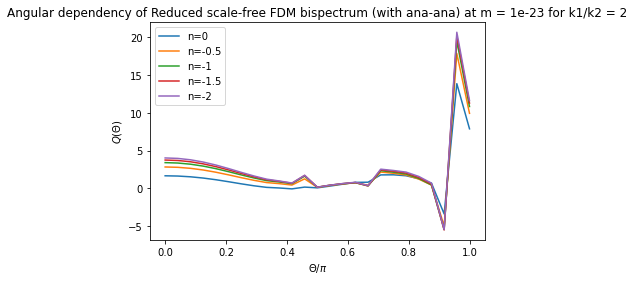

In [2]:
import fdm.coupling 
import numpy as np
import bispectrum

masses = [1e-23]
bispectra = {}
for m in masses:
    bispectra[str(m)] = plot_reduced_bispectrum(f"Reduced scale-free FDM bispectrum (with ana-ana) at m = {m}", fdm.coupling.F2s, (constants.ETA_FIN, m), 25)


In [4]:
np.save("ana_num_red_bi.npy", bispectra)

### FDM Ana-CDM sup

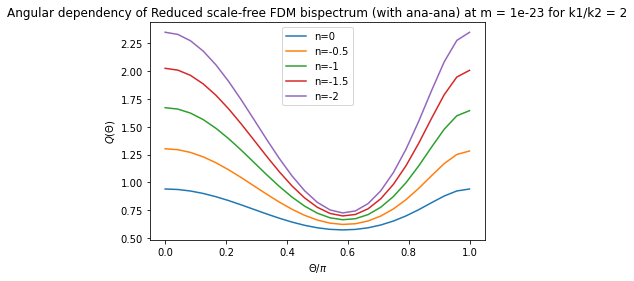

In [2]:
import fdm.coupling 
import numpy as np
import bispectrum

masses = [1e-23]
bispectra = {}
for m in masses:
    bispectra[str(m)] = plot_reduced_bispectrum(f"Reduced scale-free FDM bispectrum (with ana-ana) at m = {m}", fdm.coupling.F2s, (constants.ETA_FIN, m), 25)


In [3]:
np.save("ana_sup_red_bi.npy", bispectra)

### FDM sup-sup

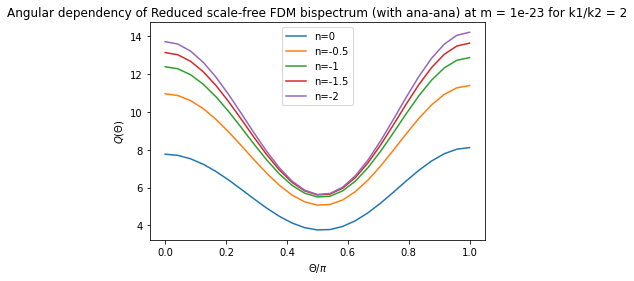

In [9]:
import fdm.coupling 
import numpy as np
import bispectrum

masses = [1e-23]
bispectra = {}
for m in masses:
    bispectra[str(m)] = plot_reduced_bispectrum(f"Reduced scale-free FDM bispectrum (with ana-ana) at m = {m}", fdm.coupling.F2s, (constants.ETA_FIN, m), 25)


In [10]:
np.save("sup_sup_red_bi.npy", bispectra)

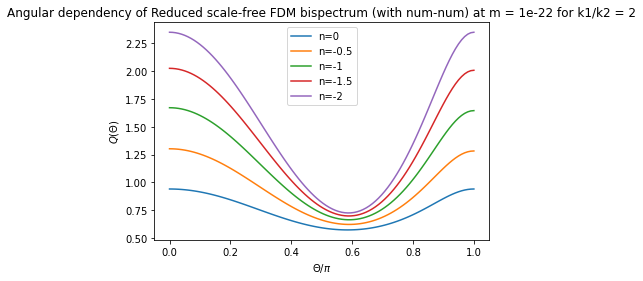

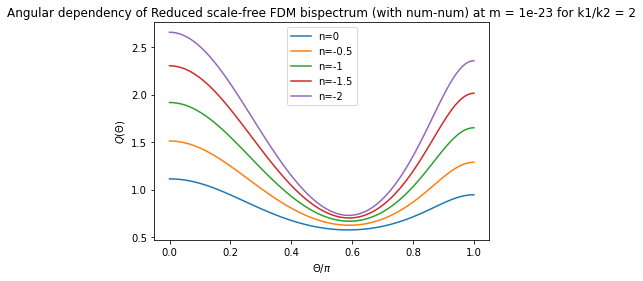

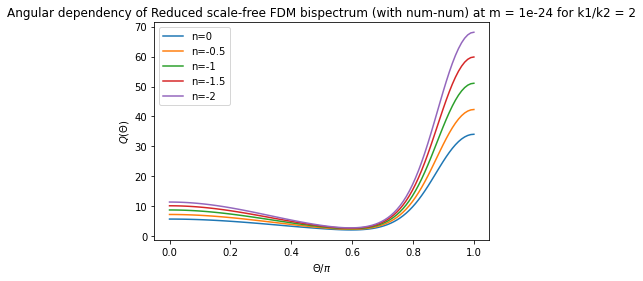

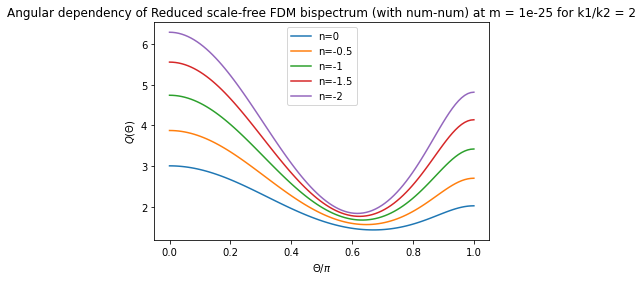

In [15]:
import fdm.coupling 
import numpy as np
import bispectrum

masses = [1e-22, 1e-23, 1e-24, 1e-25]
for m in masses:
    plot_reduced_bispectrum(f"Reduced scale-free FDM bispectrum (with num-num) at m = {m}", fdm.coupling.F2s, (constants.ETA_FIN, m))


In [8]:
import constants 
import fdm.util 
masses = [1e-22, 1e-23, 1e-24, 1e-25]
for m in masses:
  print("Jeans scale at mass: ", m, " is ", fdm.util.lague_kj(constants.A_FIN, m, omega_dm = 1.0))

Jeans scale at mass:  1e-22  is  59.53097253964391
Jeans scale at mass:  1e-23  is  18.825346455021318
Jeans scale at mass:  1e-24  is  5.9530972539643905
Jeans scale at mass:  1e-25  is  1.8825346455021317


### Loop bispectra

In [55]:
from multiprocessing import Pool, pool
import pandas as pd
import numpy  as np
import bispectrum
import constants
import cdm.spectrum
import cdm.p1l 


        
def compute_b1l(f, eta, equilateral = True, r1 = 2.0, r2 = 1.0, N = 10):
  data = pd.DataFrame(columns = ["x", "sigma tree", "sigma loop", "sigma loop sdev", "red. bispectrum tree", "bispectrum loop", "bispectrum loop sdev", "red. bispectrum", "red. bispectrum sdev"]) 

  #Prepare input array for starmap
  input_data = []

  if equilateral:
    #Initialise arrays
    x = constants.SPLINE_MOMENTA
    k1, k2, k3 = bispectrum.generate_triangle()

    #Fill input for starmap
    for i in range(n):
      input_data.append([x[i], x[i]*k1, x[i]*k2, x[i]*k3, eta])

  else:
    x = np.linspace(0.01, 0.99, N)

    #Initialise integrator
    theta = x[0] * np.pi
    k1, k2, k3 = bispectrum.generate_triangle(theta, r1, r2)

    #Fill input array for starmap
    for i in range(N):
      theta = x[i] * np.pi
      k1, k2, k3 = bispectrum.generate_triangle(theta, r1, r2)
      input_data.append([theta, k1, k2, k3, eta])

  with Pool() as pool:
      res = pool.starmap(f, input_data)
      data = data.append(res, ignore_index=True)

  return data

def plot_bispectrum(title, xlabel, spectra):

    data    = spectra["red. bispectrum tree"] + spectra["red. bispectrum loop"]
    v_upper = [v.n + v.s for v in data]
    v_lower = [v.n - v.s for v in data]
    v_mean  = [v.n       for v in data]

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("$Q(\Theta)$")

    plt.plot(spectra["x"], spectra["red. bispectrum tree"], label="Tree level")
    plt.plot(spectra["x"], v_mean, label="1-loop", color="blue")
    plt.fill_between(spectra["momentum"], 
                    v_lower, 
                    v_upper,
                    color='blue', alpha=0.2)
    plt.legend()
    plt.show()


In [ ]:

def compute_b1l_from_module(equilateral, r1, r2, N, args, module, key):
    global compute_bispectrum
    eta, m = args 

    def compute_bispectrum(x, k1, k2, k3, eta):
        return bispectrum.compute_bispectrum(x, k1, k2, k3, eta, m, util, module.vegas_integrators[key], debug = True)

    return compute_b1l(compute_bispectrum, eta, equilateral = equilateral, r1 = r1, r2 = r2, N = N)


def compute_all_bispectra():
    modules = [cdm.bispectrum, fdm.bispectrum]
    bispectra = {
    }
    for i, module in enumerate(modules):
        if i == 0:
            args = [eta, 0]
            module_name = "CDM"
        elif i == 1:
            args = [eta, m]
            module_name = "FDM"
        else:
            raise ValueError("Only CDM and FDM available!")

        for key, util in module.utils.items():
            print(module, key)

            bispectra[module_name + " " + key] = compute_b1l_from_module(args, module, key)
    return bispectra

In [ ]:
compute_b1l_from_module(True, 1, 1, 4, [constants.ETA_FIN, constants.FDM_M], cdm.b1l, "CDM_IC")

In [ ]:
data = bispectra["CDM CDM IC"].copy()
plot_bispectrum(r"CDM red. bispectrum with angle $\theta$" + f"between r1 and and r2 with r1/r2 = {r1/r2}", r"angle $\theta$", data)

data = bispectra["CDM Scale-free"].copy()
plot_bispectrum(r"CDM scale-free n = -2 red. bispectrum with angle $\theta$" + f"between r1 and and r2 with r1/r2 = {r1/r2}", r"angle $\theta$", data)


data = bispectra["FDM Scale-free"].copy()
plot_bispectrum(r"FDM scale-free n = -2 red. bispectrum with angle $\theta$" + f"between r1 and and r2 with r1/r2 = {r1/r2} at m = {m}", r"angle $\theta$", data)


data = bispectra["FDM CDM IC"].copy()
plot_bispectrum(r"FDM red. bispectrum (CDM IC) with angle $\theta$" + f"between r1 and and r2 with r1/r2 = {r1/r2} at m = {m}", r"angle $\theta$", data)


data = bispectra["FDM FDM IC"].copy()
plot_bispectrum(r"FDM red. bispectrum (FDM IC) with angle $\theta$" + f"between r1 and and r2 with r1/r2 = {r1/r2} at m = {m}", r"angle $\theta$", data)